# **Machine Learning Homework**

1. **Import the dataset and explore the data** (3 points)
Check data contents, provide descriptive statistics and check for incoherencies in the
data.
Explore data visually and extract relevant insights. Explain your rationale and
findings. Do not forget to analyse multivariate relationships.

2. **Clean and pre-process the dataset** (5 points)
Are there any missing values? Take action to handle them.
Check the dataset for outliers and pre-process them. Justify your decisions.
Deal with categorical variables.
Review current features and create extra features if needed. Explain your steps.
Perform data scaling. Explain the reasoning behind your choices.

3. **Feature selection** (3 points)
Define and implement an unambiguous strategy for feature selection. Use methods
discussed in the course. Present and justify your final selection.

4. **Build a simple model and assess the performance** (4 points)
Identify the type of the problem and select the relevant algorithms.
Use cross-validation to assess performance. Which metrics did you use and why?
Train at least 1 model using the train dataset and obtain predictions for the test
dataset.

(Extra 1 point) Submit a solution to Kaggle with a macro F1-score of more than 0.6.

PDF file:

5. Describe the overall structure of your final report (5 points)
Detail your intended contents for each section of your final report.
Present and explain the rationale of your open-ended section.
Readability and consistency will be considered during grading, so include sufficient
comments and maintain a well-defined structure throughout your work.

# **Project**

## **Context**

The New York Workers’ Compensation Board (WCB) administers and regulates workers’ compensation, disability, volunteer firefighters, volunteer ambulance workers, and volunteer civil defence workers’ benefits. As the regulating authority, the WCB is responsible for assembling and deciding on claims whenever it becomes aware of a workplace injury. Since 2000, the WCB has assembled and reviewed more than 5 million claims. However, manually reviewing all claims is an arduous and time-consuming process. For that reason, the WCB has reached out to Nova IMS to assist them in the creation of a model that can automate the decision-making whenever a new claim is received.

## **Expected Outcomes**

1. **Multiclass Classification Benchmarking**: Create a classification model
that can accurately predict the WCB’s final decision on what type of
injury (Claim Injury Type) should be given to a claim. To do that, the
WCB has provided labelled data with all claims assembled between
2020 and 2022. You will need to develop a consistent model
assessment strategy that will allow you to create and compare
different candidate models to find the most generalizable one.

2. **Model Optimization**: After selecting your best (or set of best) models, you are encouraged to explore ways to improve their performance (e.g. hyper-parameter tuning or pre-processing/feature selection adjustments). You should compare the optimized model with your previous models and discuss your findings.

3. **Additional Insights**: This project segment is open-ended, meaning you can explore as many ideas as you desire (as long as you make them explicit and understandable). Here are some possible suggestions:

   * Analyze and discuss the importance of the features for the different
values of the target variable.

  * Create an analytics interface that returns a prediction when new
inputs are given.

  * Create a model that predicts other variables ('WCB Decision' or 'Agreement Reached') and check whether using these variables as features improves the performance of your models.

# **Data Dictionary**

| Attribute | Description |
|-----------|-------------|
| Accident Date | Injury date of the claim |
| Age at Injury | Age of injured worker when the injury occurred |
| Alternative Dispute Resolution | Adjudication processes external to the Board |
| Assembly Date | The date the claim was first assembled |
| Attorney/Representative | Is the claim being represented by an Attorney? |
| Average Weekly Wage | The wage used to calculate workers' compensation, disability, or Paid Leave wage replacement benefits |
| Birth Year | The reported year of birth of the injured worker |
| C-2 Date | Date of receipt of the Employer's Report of Work-Related Injury/Illness or equivalent (formerly Form C-2) |
| C-3 Date | Date Form C-3 (Employee Claim Form) was received |
| Carrier Name | Name of primary insurance provider responsible for providing workers' compensation coverage to the injured worker's employer |
| Carrier Type | Type of primary insurance provider responsible for providing workers' compensation coverage |
| Claim Identifier | Unique identifier for each claim, assigned by WCB |
| County of Injury | Name of the New York County where the injury occurred |
| COVID-19 Indicator | Indication that the claim may be associated with COVID-19 |
| District Name | Name of the WCB district office that oversees claims for that region or area of the state |
| First Hearing Date | Date the first hearing was held on a claim at a WCB hearing location. A blank date means the claim has not yet had a hearing held |
| Gender | The reported gender of the injured worker |
| IME-4 Count | Number of IME-4 forms received per claim. The IME-4 form is the "Independent Examiner's Report of Independent Medical Examination" form |
| Industry Code | NAICS code (descriptions available at: https://www.naics.com/search-naics-codes-by-industry/) |
| Industry Code Description | 2-digit NAICS industry code description used to classify businesses according to their economic activity |
| Medical Fee Region | Approximate region where the injured worker would receive medical service |
| OIICS Nature of Injury Description | The OIICS nature of injury codes & descriptions (available at https://www.bls.gov/iif/oiics_manual_2007.pdf) |
| WCIO Cause of Injury Code | The WCIO cause of injury codes & descriptions (available at https://www.wcio.org/Active%20PNC/WCIO_Cause_Table.pdf) |
| WCIO Cause of Injury Description | Description of the WCIO cause of injury |
| WCIO Nature of Injury Code | The WCIO nature of injury codes (available at https://www.wcio.org/Active%20PNC/WCIO_Nature_Table.pdf) |
| WCIO Nature of Injury Description | Description of the WCIO nature of injury |
| WCIO Part Of Body Code | The WCIO part of body codes & descriptions (available at https://www.wcio.org/Active%20PNC/WCIO_Part_Table.pdf) |
| WCIO Part Of Body Description | Description of the WCIO part of body |
| Zip Code | The reported ZIP code of the injured worker's home address |
| Agreement Reached | Binary variable: Yes if there is an agreement without the involvement of the WCB (unknown at the start of a claim) |
| WCB Decision | Multiclass variable: Decision of the WCB relative to the claim ("Accident" means claim refers to workplace accident, "Occupational Disease" means illness from the workplace) - requires WCB deliberation so unknown at start of claim |
| Claim Injury Type | Main target variable: Deliberation of the WCB relative to benefits awarded to the claim. Numbering indicates severity |

# **Imported libraries**

In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import os
import warnings
warnings.filterwarnings('ignore')


In [12]:
# define maximum number of columns to be displayed in a dataframe
pd.set_option("display.max_columns", None)

# supress scientific notations for a dataframe
pd.set_option("display.float_format", lambda x: "%.3f" % x)

# **Loading Data**

In [14]:
df_train = pd.read_csv("train_data.csv", low_memory=False)
df_test = pd.read_csv("test_data.csv",low_memory=False) # needed to submit to Kaggle

# **Data Overview**

In [16]:
df_train.head()

,Accident Date,Age at Injury,Alternative Dispute Resolution,Assembly Date,Attorney/Representative,Average Weekly Wage,Birth Year,C-2 Date,C-3 Date,Carrier Name,Carrier Type,Claim Identifier,Claim Injury Type,County of Injury,COVID-19 Indicator,District Name,First Hearing Date,Gender,IME-4 Count,Industry Code,Industry Code Description,Medical Fee Region,OIICS Nature of Injury Description,WCIO Cause of Injury Code,WCIO Cause of Injury Description,WCIO Nature of Injury Code,WCIO Nature of Injury Description,WCIO Part Of Body Code,WCIO Part Of Body Description,Zip Code,Agreement Reached,WCB Decision,Number of Dependents
0,2019-12-30,31.000,N,2020-01-01,N,0.000,1988.000,2019-12-31,NaN,NEW HAMPSHIRE INSURANCE CO,1A. PRIVATE,5393875,2. NON-COMP,ST. LAWRENCE,N,SYRACUSE,NaN,M,NaN,44.000,RETAIL TRADE,I,NaN,27.000,FROM LIQUID OR GREASE SPILLS,10.000,CONTUSION,62.000,BUTTOCKS,13662,0.000,Not Work Related,1.000
1,2019-08-30,46.000,N,2020-01-01,Y,1745.930,1973.000,2020-01-01,2020-01-14,ZURICH AMERICAN INSURANCE CO,1A. PRIVATE,5393091,4. TEMPORARY,WYOMING,N,ROCHESTER,2020-02-21,F,4.000,23.000,CONSTRUCTION,I,NaN,97.000,REPETITIVE MOTION,49.000,SPRAIN OR TEAR,38.000,SHOULDER(S),14569,1.000,Not Work Related,4.000
2,2019-12-06,40.000,N,2020-01-01,N,1434.800,1979.000,2020-01-01,NaN,INDEMNITY INSURANCE CO OF,1A. PRIVATE,5393889,4. TEMPORARY,ORANGE,N,ALBANY,NaN,M,NaN,56.000,ADMINISTRATIVE AND SUPPORT AND WASTE MANAGEMEN...,II,NaN,79.000,OBJECT BEING LIFTED OR HANDLED,7.000,CONCUSSION,10.000,MULTIPLE HEAD INJURY,12589,0.000,Not Work Related,6.000
3,NaN,NaN,NaN,2020-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,957648180,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2019-12-30,61.000,N,2020-01-01,N,NaN,1958.000,2019-12-31,NaN,STATE INSURANCE FUND,2A. SIF,5393887,2. NON-COMP,DUTCHESS,N,ALBANY,NaN,M,NaN,62.000,HEALTH CARE AND SOCIAL ASSISTANCE,II,NaN,16.000,"HAND TOOL, UTENSIL; NOT POWERED",43.000,PUNCTURE,36.000,FINGER(S),12603,0.000,Not Work Related,1.000


In [17]:
df_test.head()

,Accident Date,Age at Injury,Alternative Dispute Resolution,Assembly Date,Attorney/Representative,Average Weekly Wage,Birth Year,C-2 Date,C-3 Date,Carrier Name,Carrier Type,Claim Identifier,County of Injury,COVID-19 Indicator,District Name,First Hearing Date,Gender,IME-4 Count,Industry Code,Industry Code Description,Medical Fee Region,OIICS Nature of Injury Description,WCIO Cause of Injury Code,WCIO Cause of Injury Description,WCIO Nature of Injury Code,WCIO Nature of Injury Description,WCIO Part Of Body Code,WCIO Part Of Body Description,Zip Code,Number of Dependents
0,2022-12-24,19,N,2023-01-02,N,NaN,2003.000,2023-01-02,NaN,INDEMNITY INSURANCE CO OF,1A. PRIVATE,6165911,BRONX,N,NYC,NaN,M,NaN,48.000,TRANSPORTATION AND WAREHOUSING,IV,NaN,31.000,"FALL, SLIP OR TRIP, NOC",10.000,CONTUSION,54.000,LOWER LEG,10466,1
1,2022-11-20,19,N,2023-01-02,N,NaN,2003.000,2023-01-02,NaN,A I U INSURANCE COMPANY,1A. PRIVATE,6166141,QUEENS,N,NYC,NaN,F,NaN,45.000,RETAIL TRADE,IV,NaN,75.000,FALLING OR FLYING OBJECT,10.000,CONTUSION,10.000,MULTIPLE HEAD INJURY,11691,1
2,2022-12-26,59,N,2023-01-02,N,0.000,1963.000,2022-12-31,NaN,AMGUARD INSURANCE COMPANY,1A. PRIVATE,6165907,WESTCHESTER,N,NYC,NaN,F,NaN,56.000,ADMINISTRATIVE AND SUPPORT AND WASTE MANAGEMEN...,III,NaN,68.000,STATIONARY OBJECT,49.000,SPRAIN OR TEAR,62.000,BUTTOCKS,10604,0
3,2022-12-28,55,N,2023-01-02,N,0.000,0.000,2023-01-02,NaN,INDEMNITY INS. OF N AMERICA,1A. PRIVATE,6166047,QUEENS,N,NYC,NaN,F,NaN,48.000,TRANSPORTATION AND WAREHOUSING,IV,NaN,25.000,FROM DIFFERENT LEVEL (ELEVATION),10.000,CONTUSION,53.000,KNEE,11411,6
4,2022-12-20,25,N,2023-01-02,N,0.000,1997.000,2022-12-31,NaN,NEW HAMPSHIRE INSURANCE CO,1A. PRIVATE,6166102,KINGS,N,NYC,NaN,M,NaN,55.000,MANAGEMENT OF COMPANIES AND ENTERPRISES,IV,NaN,79.000,OBJECT BEING LIFTED OR HANDLED,40.000,LACERATION,37.000,THUMB,11212,5


In [18]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 593471 entries, 0 to 593470
Data columns (total 33 columns):
 #   Column                              Non-Null Count   Dtype  
---  ------                              --------------   -----  
 0   Accident Date                       570337 non-null  object 
 1   Age at Injury                       574026 non-null  float64
 2   Alternative Dispute Resolution      574026 non-null  object 
 3   Assembly Date                       593471 non-null  object 
 4   Attorney/Representative             574026 non-null  object 
 5   Average Weekly Wage                 545375 non-null  float64
 6   Birth Year                          544948 non-null  float64
 7   C-2 Date                            559466 non-null  object 
 8   C-3 Date                            187245 non-null  object 
 9   Carrier Name                        574026 non-null  object 
 10  Carrier Type                        574026 non-null  object 
 11  Claim Identifier          

In [19]:
print(df_train.shape)
print(df_test.shape)

(593471, 33)
(387975, 30)


The training dataset has **593471 rows** and **33 columns**\
The test dataset has **387975 rows** and **30 columns**

In [21]:
#setting the column 'Claim Identifier' as the index
df_train.set_index('Claim Identifier')
df_test.set_index('Claim Identifier')

,Accident Date,Age at Injury,Alternative Dispute Resolution,Assembly Date,Attorney/Representative,Average Weekly Wage,Birth Year,C-2 Date,C-3 Date,Carrier Name,Carrier Type,County of Injury,COVID-19 Indicator,District Name,First Hearing Date,Gender,IME-4 Count,Industry Code,Industry Code Description,Medical Fee Region,OIICS Nature of Injury Description,WCIO Cause of Injury Code,WCIO Cause of Injury Description,WCIO Nature of Injury Code,WCIO Nature of Injury Description,WCIO Part Of Body Code,WCIO Part Of Body Description,Zip Code,Number of Dependents
Claim Identifier,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
6165911,2022-12-24,19,N,2023-01-02,N,NaN,2003.000,2023-01-02,NaN,INDEMNITY INSURANCE CO OF,1A. PRIVATE,BRONX,N,NYC,NaN,M,NaN,48.000,TRANSPORTATION AND WAREHOUSING,IV,NaN,31.000,"FALL, SLIP OR TRIP, NOC",10.000,CONTUSION,54.000,LOWER LEG,10466,1
6166141,2022-11-20,19,N,2023-01-02,N,NaN,2003.000,2023-01-02,NaN,A I U INSURANCE COMPANY,1A. PRIVATE,QUEENS,N,NYC,NaN,F,NaN,45.000,RETAIL TRADE,IV,NaN,75.000,FALLING OR FLYING OBJECT,10.000,CONTUSION,10.000,MULTIPLE HEAD INJURY,11691,1
6165907,2022-12-26,59,N,2023-01-02,N,0.000,1963.000,2022-12-31,NaN,AMGUARD INSURANCE COMPANY,1A. PRIVATE,WESTCHESTER,N,NYC,NaN,F,NaN,56.000,ADMINISTRATIVE AND SUPPORT AND WASTE MANAGEMEN...,III,NaN,68.000,STATIONARY OBJECT,49.000,SPRAIN OR TEAR,62.000,BUTTOCKS,10604,0
6166047,2022-12-28,55,N,2023-01-02,N,0.000,0.000,2023-01-02,NaN,INDEMNITY INS. OF N AMERICA,1A. PRIVATE,QUEENS,N,NYC,NaN,F,NaN,48.000,TRANSPORTATION AND WAREHOUSING,IV,NaN,25.000,FROM DIFFERENT LEVEL (ELEVATION),10.000,CONTUSION,53.000,KNEE,11411,6
6166102,2022-12-20,25,N,2023-01-02,N,0.000,1997.000,2022-12-31,NaN,NEW HAMPSHIRE INSURANCE CO,1A. PRIVATE,KINGS,N,NYC,NaN,M,NaN,55.000,MANAGEMENT OF COMPANIES AND ENTERPRISES,IV,NaN,79.000,OBJECT BEING LIFTED OR HANDLED,40.000,LACERATION,37.000,THUMB,11212,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6553137,2012-09-12,52,N,2024-06-05,N,NaN,1960.000,2012-10-23,NaN,STATE INSURANCE FUND,2A. SIF,JEFFERSON,N,SYRACUSE,NaN,M,NaN,NaN,NaN,I,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13619,5
6553119,2024-05-22,59,N,2024-06-05,Y,0.000,1965.000,NaN,2024-05-28,NYC TRANSIT AUTHORITY,3A. SELF PUBLIC,SUFFOLK,N,HAUPPAUGE,NaN,F,NaN,NaN,NaN,IV,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11776,1
6553542,2024-05-06,45,N,2024-06-05,Y,0.000,1979.000,NaN,NaN,STATE INSURANCE FUND,2A. SIF,QUEENS,N,NYC,NaN,M,NaN,NaN,NaN,IV,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11368,5


**Summary statistics**

In [23]:
df_train.describe(include="all").T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Accident Date,570337,5539,2020-03-01,1245,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Age at Injury,574026.000,NaN,NaN,NaN,42.114,14.256,0.000,31.000,42.000,54.000,117.000
Alternative Dispute Resolution,574026,3,N,571412,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Assembly Date,593471,1096,2020-03-06,1422,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Attorney/Representative,574026,2,N,392291,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Average Weekly Wage,545375.000,NaN,NaN,NaN,491.088,6092.918,0.000,0.000,0.000,841.000,2828079.000
Birth Year,544948.000,NaN,NaN,NaN,1886.768,414.644,0.000,1965.000,1977.000,1989.000,2018.000
C-2 Date,559466,2475,2021-05-11,1847,NaN,NaN,NaN,NaN,NaN,NaN,NaN
C-3 Date,187245,1648,2021-04-21,350,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Carrier Name,574026,2046,STATE INSURANCE FUND,111144,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# **Exploratory Data Analysis**

## **Initial Exploration**

In [26]:
# Check duplicate values
print(df_train.duplicated().sum())
print(df_test.duplicated().sum())

0
0


In [27]:
# percentage of rows with missing values
print((df_train.isna().sum().astype(str) + " missing values (" +
      df_train.isnull().mean().mul(100).round(2).astype(str) + "%)"))
print(f"\n{'='*50}\n")
print((df_test.isna().sum().astype(str) + " missing values (" +
      df_test.isnull().mean().mul(100).round(2).astype(str) + "%)"))

Accident Date                            23134 missing values (3.9%)
Age at Injury                           19445 missing values (3.28%)
Alternative Dispute Resolution          19445 missing values (3.28%)
Assembly Date                                0 missing values (0.0%)
Attorney/Representative                 19445 missing values (3.28%)
Average Weekly Wage                      48096 missing values (8.1%)
Birth Year                              48523 missing values (8.18%)
C-2 Date                                34005 missing values (5.73%)
C-3 Date                              406226 missing values (68.45%)
Carrier Name                            19445 missing values (3.28%)
Carrier Type                            19445 missing values (3.28%)
Claim Identifier                             0 missing values (0.0%)
Claim Injury Type                       19445 missing values (3.28%)
County of Injury                        19445 missing values (3.28%)
COVID-19 Indicator                

We can see that **"OIICS Nature of Injury Description"** has 100% missing values, so we can drop it

In [29]:
# Columns on the train dataset not in test dataset
set(df_train.columns) - set(df_test.columns)

{'Agreement Reached', 'Claim Injury Type', 'WCB Decision'}

Since **'Agreement Reached'** and **'WCB Decision'** are not in the test dataset, we might drop them later on, since we are going to build a model to predict the main target variable (Claim Injury Type)

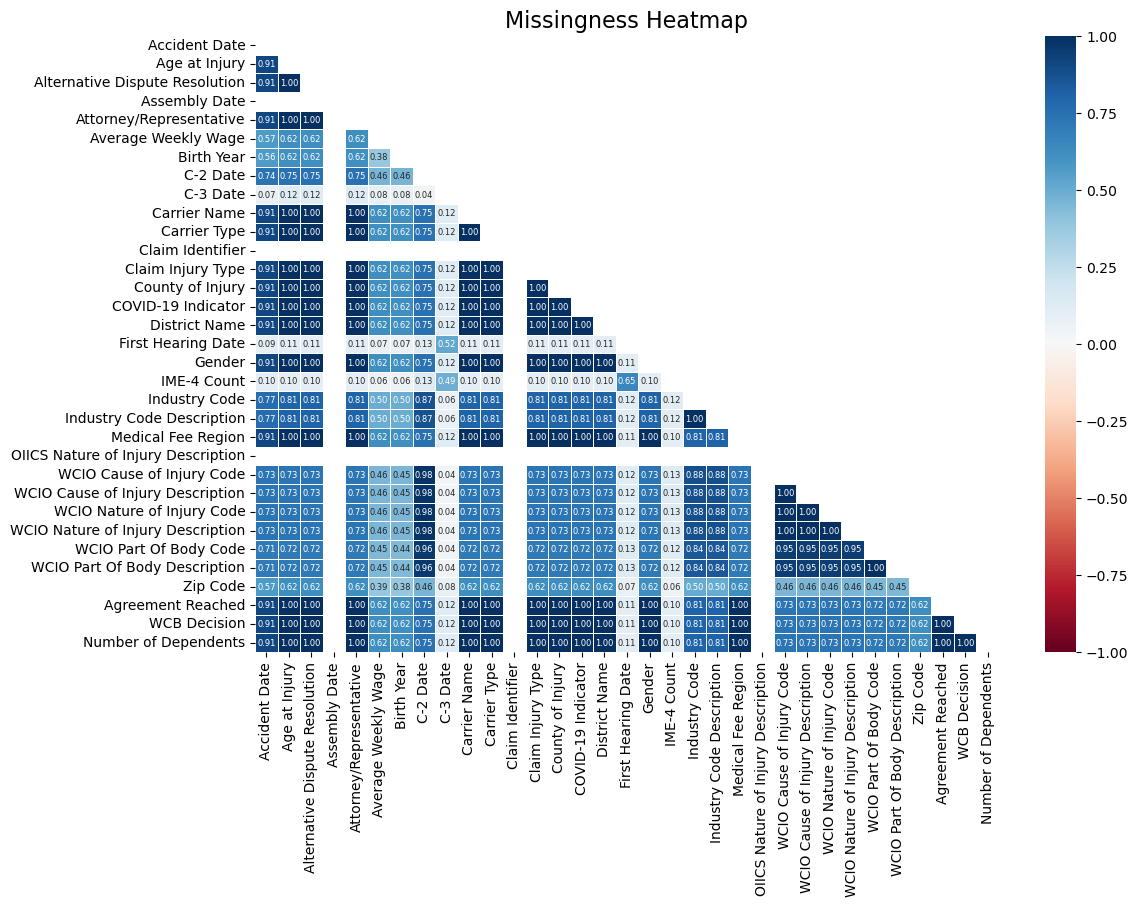

In [31]:
def create_missingness_heatmap(df, specific_vars=None,
                               title='Missingness Heatmap',
                               annot_fontsize=8, figsize=(12, 8),
                               corr_threshold=None):


    if specific_vars is not None:
        missing_columns = [var for var in specific_vars if var not in df.columns]
        if missing_columns:
            raise ValueError(f"The following specified columns are not in the DataFrame: {missing_columns}")
        vars_to_analyze = specific_vars
    else:
        vars_to_analyze = df.columns

    missing_df = df[vars_to_analyze].isnull().astype(int)  
    missing_corr = missing_df.corr()

    upper_triangle_mask = np.triu(np.ones_like(missing_corr, dtype=bool))

    if corr_threshold is not None:
        threshold_mask = (np.abs(missing_corr) < corr_threshold)
        mask = np.logical_or(upper_triangle_mask, threshold_mask)
    else:
        mask = upper_triangle_mask

    plt.figure(figsize=figsize)
    sns.heatmap(missing_corr, cmap='RdBu', annot=True, fmt=".2f",
                vmin=-1, vmax=1, linewidths=.5, mask=mask,
                annot_kws={"size": annot_fontsize})
    plt.title(title, fontsize=16)
    plt.show()
create_missingness_heatmap(df_train, annot_fontsize=6)

From this graphic, we can see that there are features that are strongly connected in terms of missing values.
For example, Carrier Type and Carrier Name have a value of 1.00, so if a cell is a missing value for Carrier Type, it is also a missing value for Carrier Name.

**Variables missing together**

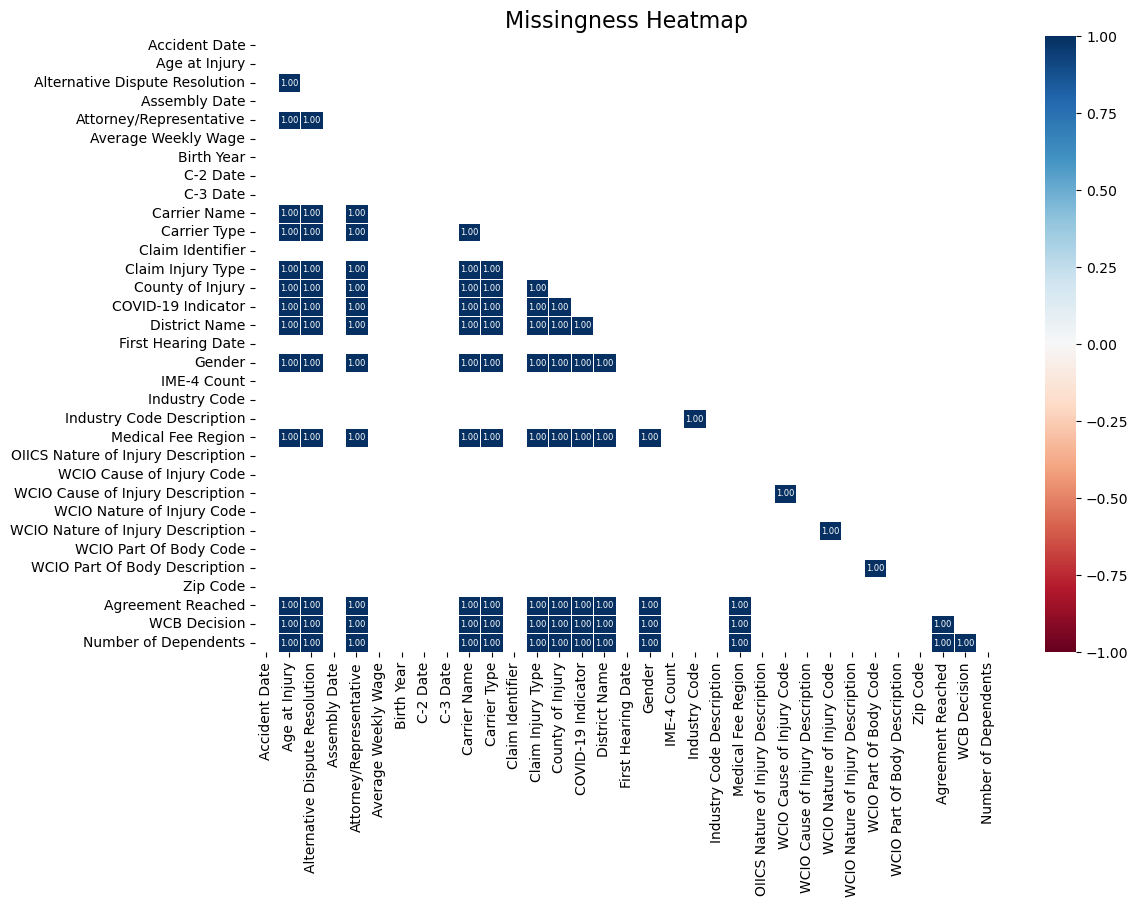

In [34]:
create_missingness_heatmap(df_train, annot_fontsize=6, corr_threshold=1)

This graphic represents the pairs of features who have the same rows with missing values.

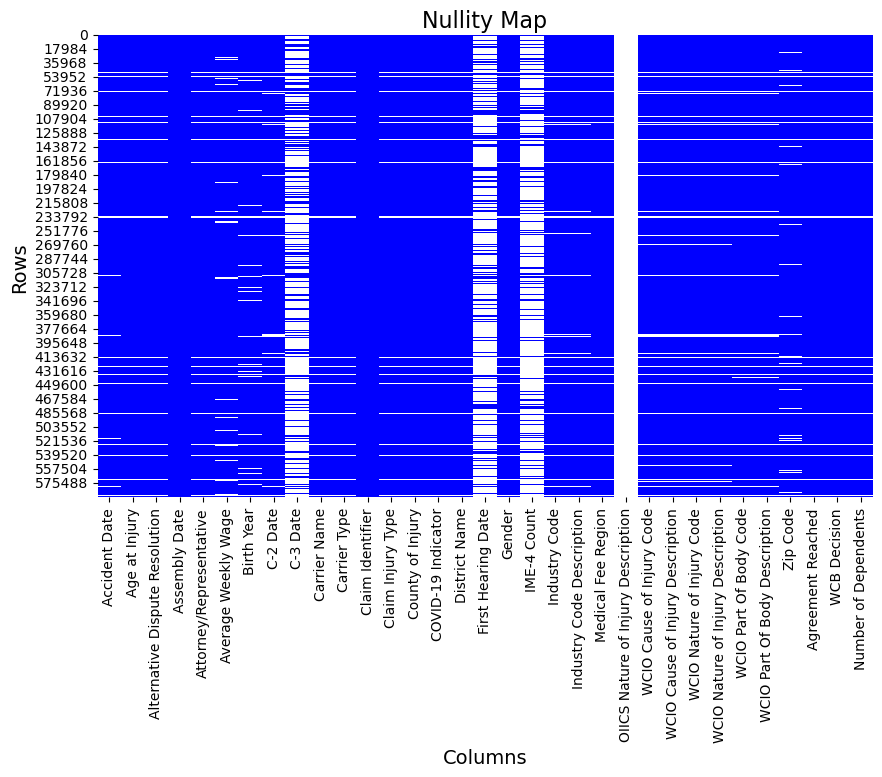

In [36]:
def create_nullity_map(df, title='Nullity Map'):
 
    nullity = df.isnull().sum() / len(df) * 100

    plt.figure(figsize=(10, 6))
    sns.heatmap(df.isnull(), cbar=False, cmap=sns.color_palette(['blue', 'white']))  
    plt.title(title, fontsize=16)
    plt.xlabel('Columns', fontsize=14)
    plt.ylabel('Rows', fontsize=14)
    plt.show()
create_nullity_map(df_train)

This graphic shows the null values among all the features, we can see that OIICS Nature of Injury Description has 100% missing values.

# **Rows Missing Target Variable and Null Columns**

In [39]:
#drop OIICS Nature of Injury Description since it has 100% missing values
df_train.drop(columns=['OIICS Nature of Injury Description'], inplace=True)
df_test.drop(columns=['OIICS Nature of Injury Description'], inplace=True)

In [40]:
#drop Agreement Reached and WCB Decision since they are not on the test dataset and we're not building a model to predict these in this part of the assignment
df_train.drop(columns=['Agreement Reached'], inplace=True)
df_train.drop(columns=['WCB Decision'], inplace=True)

In [41]:
df_copy_train = df_train.copy()

In [42]:
# drop rows from df_train where Claim Injury Type (target variable) is missing (3% of the dataset)
df_train.dropna(subset=['Claim Injury Type'], inplace=True)

# **Univariate Analysis**

## **Plotting for univariate analysis**

In [45]:
def plot_distribution_and_boxplot(data, feature):
  
    fig, axes = plt.subplots(1, 2, figsize=(15, 6))
    fig.suptitle(f'Distribution and Boxplot of {feature}', fontsize=16)

    sns.histplot(data[feature], bins=30, kde=True, ax=axes[0], color="skyblue", edgecolor="black")
    axes[0].set_title(f'Distribution of {feature}')
    axes[0].set_xlabel(feature)
    axes[0].set_ylabel('Frequency')

    for line in axes[0].get_lines():  
        line.set_linewidth(2)  
        line.set_color("darkblue") 

    sns.boxplot(x=data[feature], ax=axes[1], color="skyblue")
    axes[1].set_title(f'Boxplot of {feature}')
    axes[1].set_xlabel(feature)

    plt.tight_layout(rect=[0, 0, 1, 0.95])
    plt.show()

    stats = data[feature].describe().to_frame().T
    stats['missing'] = data[feature].isnull().sum()
    stats['missing%'] = (stats['missing'] / len(data)) * 100
    stats['zeros'] = (data[feature] == 0).sum()
    stats['zeros%'] = (stats['zeros'] / len(data)) * 100

    display(stats)

In [46]:
def plot_categorical_distribution(data, feature):
   
    original_value_counts = data[feature].value_counts()
    mode_value = original_value_counts.idxmax()
    mode_frequency = original_value_counts.max()
    missing_count = data[feature].isnull().sum()
    total_count = len(data)

    data_copy = data.copy()

    if len(original_value_counts) > 15:
        top_categories = original_value_counts.index[:15]

        data_copy[feature] = data_copy[feature].apply(lambda x: x if x in top_categories else 'Other')

        sorted_feature = data_copy[feature].value_counts().index
    else:
        sorted_feature = original_value_counts.index

    data_copy[feature] = pd.Categorical(data_copy[feature], categories=sorted_feature, ordered=True)

    plt.figure(figsize=(10, 6))
    plt.title(f'Distribution of {feature}', fontsize=16)

    ax = sns.countplot(data=data_copy, x=feature, hue=feature, palette="pastel", edgecolor="black", order=sorted_feature, legend=False)
    plt.xlabel(feature, fontsize=12)
    plt.ylabel("Count", fontsize=12)
    plt.xticks(rotation=90)

    total = len(data_copy[feature].dropna())
    for p in ax.patches:
        count = p.get_height()
        percentage = f'{100 * count / total:.1f}%'
        ax.annotate(percentage,
                    (p.get_x() + p.get_width() / 2., count),
                    ha = 'center', va = 'bottom',
                    fontsize=10,
                    color='black',
                    xytext=(0, 5),
                    textcoords='offset points')

    plt.show()

    stats = pd.DataFrame({
        "Count": [total_count - missing_count],
        "Unique": [original_value_counts.nunique()],
        "Top (Mode)": [mode_value],
        "Frequency of Top": [mode_frequency],
        "Missing": [missing_count],
        "Missing %": [(missing_count / total_count) * 100],
    })

    display(stats)

In [47]:
def plot_timeseries(df, date_column):

    df_copy = df.copy()

    df_copy[date_column] = pd.to_datetime(df_copy[date_column], errors='coerce')

    plot_df = df_copy.dropna(subset=[date_column]).copy()

    plot_df['Year'] = plot_df[date_column].dt.year
    plot_df['Month'] = plot_df[date_column].dt.month

    plot_df['Year-Month'] = plot_df['Year'].astype(str) + '-' + plot_df['Month'].astype(str).str.zfill(2)
    counts_by_year_month = plot_df.groupby('Year-Month')['Year-Month'].count().reset_index(name='Count')

    counts_by_year_month['Year-Month'] = pd.to_datetime(counts_by_year_month['Year-Month'], format='%Y-%m')

    fig, ax = plt.subplots(figsize=(12, 8))  
    ax.plot(counts_by_year_month['Year-Month'], counts_by_year_month['Count'], color="skyblue", marker='o', markersize=3)
    ax.set_title(f'Time Series of {date_column} by Year and Month', fontsize=16)
    ax.set_xlabel('Year-Month', fontsize=12)
    ax.set_ylabel('Count', fontsize=12)
    plt.xticks(rotation=45, ha='right')

    plt.tight_layout()
    plt.show()

## **Accident Date**

**Observations on Accident Date**:

* Accident date is null when the claim starts being processed.
* 3689 missing values (0.64% of total records). In these rows only claim identifier is filled in. We can drop these.  ? check this and if its right drop
* Minimum is 1961-09-06: There can be recent claims related to very old accidents.
* Maximum is 2023-09-29: The data is inconsistent since the claims were treated from 2020 to 2022 which should not be related to an accident happening after that period.
* Most frequent value is 2020-03-01
* Type Object converted to datetime

In [50]:
# check if all cells match the YYY-MM-DD format
print(df_train['Accident Date'].str.match(r'^\d{4}-\d{2}-\d{2}$').all())
print(df_test['Accident Date'].str.match(r'^\d{4}-\d{2}-\d{2}$').all())

True
True


We can convert this column to datetime as it follows the YYY-MM-DD pattern

In [52]:
# Convert Accident Date to datetime
df_train['Accident Date'] = pd.to_datetime(df_train['Accident Date'])
df_test['Accident Date'] = pd.to_datetime(df_test['Accident Date'])

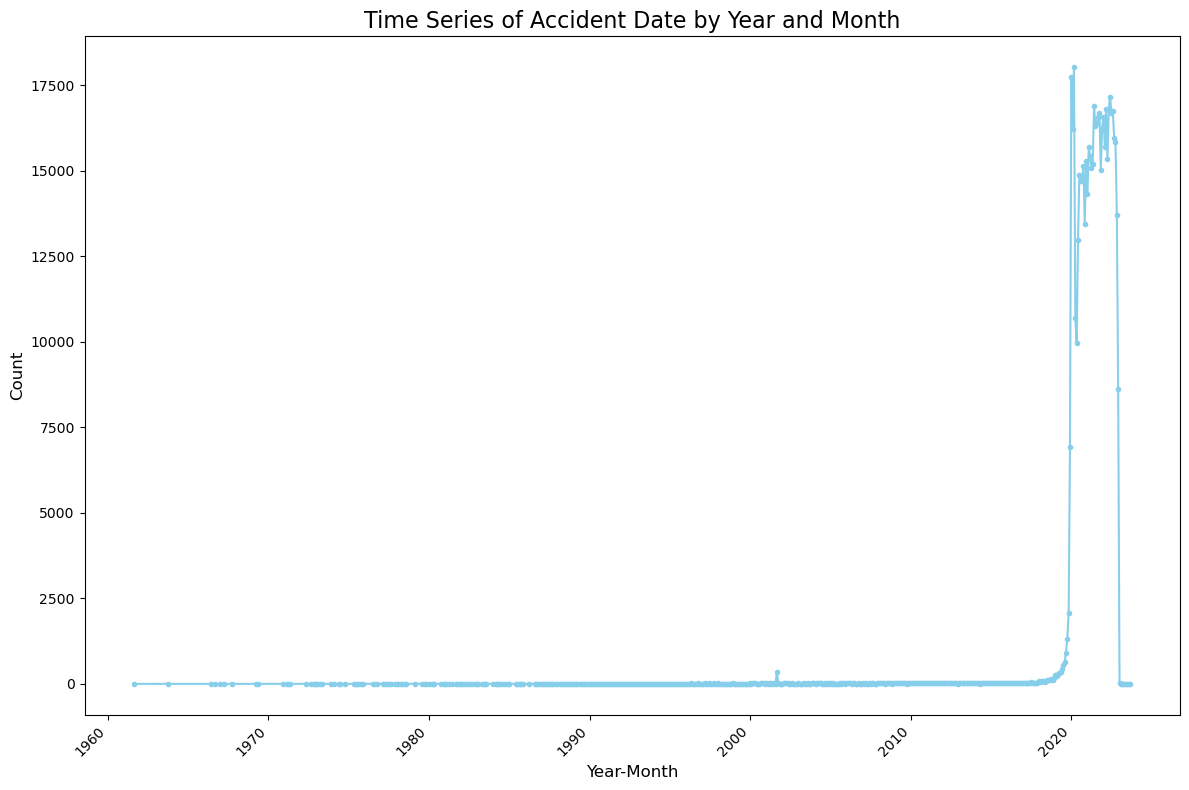

In [53]:
plot_timeseries(df_train, 'Accident Date')

In [54]:
print(df_train["Accident Date"].max().date())
print(df_train["Accident Date"].min().date())

2023-09-29
1961-09-06


## **Age at Injury**

**Observations on Age at Injury**:
* Minimum is 0: there cannot be people with 0 years old working
* Maximum is 117: there cannot be people with that age still working
* We have big extremes values that will be handled in the pre-processing
* The mean is 42 years old
* Distribution more or less follows a normal distribution
* Type float converted to int

In [57]:
#Convert Age at Injury to an int
df_train['Age at Injury'] = df_train['Age at Injury'].astype(int)
df_test['Age at Injury']=df_test['Age at Injury'].astype(int)

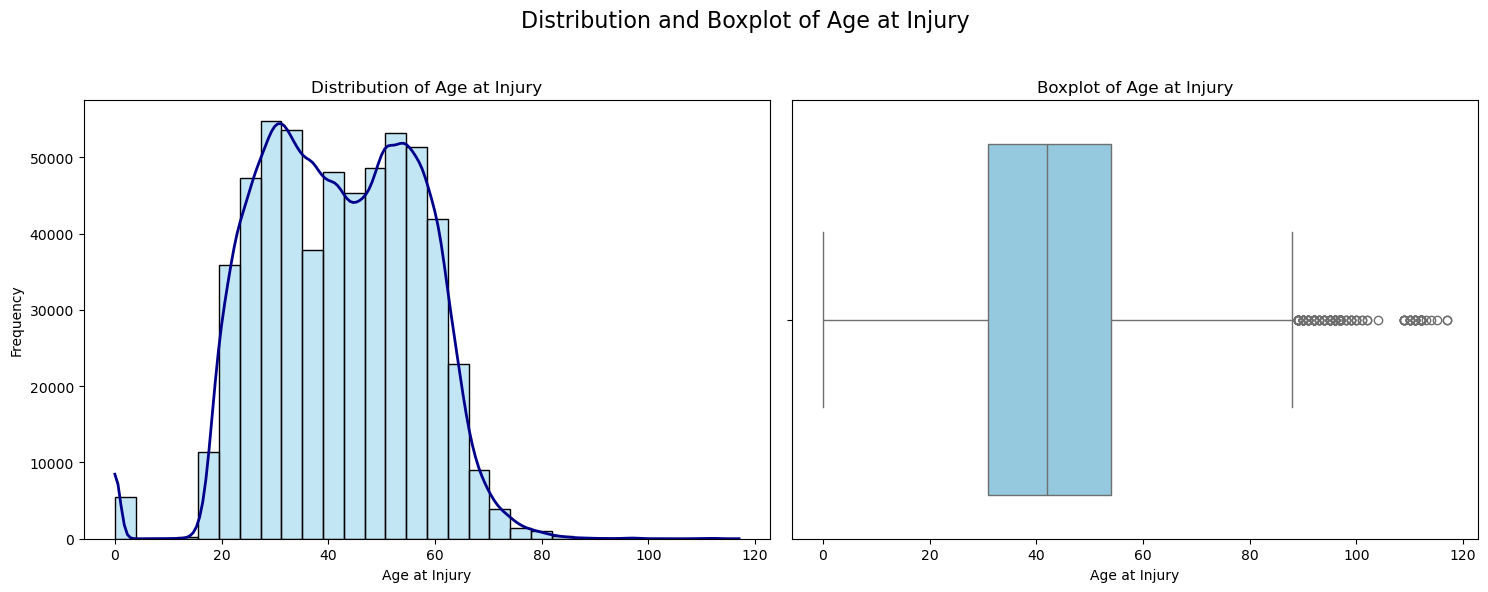

,count,mean,std,min,25%,50%,75%,max,missing,missing%,zeros,zeros%
Age at Injury,574026.000,42.114,14.256,0.000,31.000,42.000,54.000,117.000,0,0.000,5464,0.952


In [58]:
plot_distribution_and_boxplot(df_train, 'Age at Injury')

## **Alternative Dispute Resolution**

**Observations on Alternative Dispute Resolution**:
* Really imbalanced 99.5% are 0, we have 5 values with U that means Unknown
* No missing values

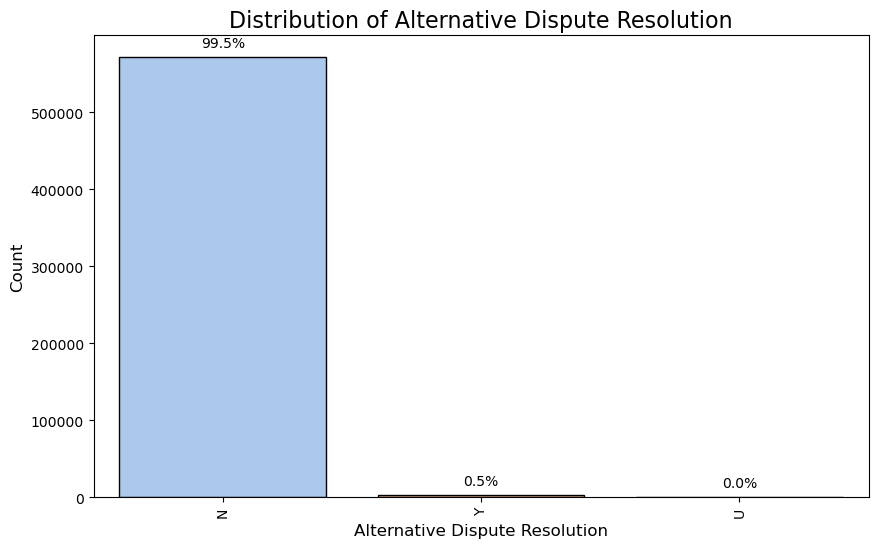

,Count,Unique,Top (Mode),Frequency of Top,Missing,Missing %
0,574026,3,N,571412,0,0.000


In [61]:
plot_categorical_distribution(df_train, 'Alternative Dispute Resolution')

In [62]:
# How does target variable change with Alternative Dispute Resolution category?
df_train.groupby('Alternative Dispute Resolution')['Claim Injury Type'].value_counts(normalize=True)

Alternative Dispute Resolution  Claim Injury Type
N                               2. NON-COMP         0.505
                                4. TEMPORARY        0.260
                                3. MED ONLY         0.121
                                5. PPD SCH LOSS     0.084
                                1. CANCELLED        0.022
                                6. PPD NSL          0.007
                                8. DEATH            0.001
                                7. PTD              0.000
U                               2. NON-COMP         1.000
Y                               2. NON-COMP         0.993
                                1. CANCELLED        0.007
Name: proportion, dtype: float64

When Alternative Dispute Resolution is U or Y almost all Claim Injury Type = NON-COMP

In [64]:
# change Alternative Dispute Resolution to category
df_train['Alternative Dispute Resolution'] = df_train['Alternative Dispute Resolution'].astype('category')
df_test['Alternative Dispute Resolution'] = df_test['Alternative Dispute Resolution'].astype('category')

## **Assembly Date**

**Observations on Assembly Date**:
* Type object converted to datetime
* The minimum is 2020-01-01
* The maximum is 2022-12-31
* The most frequent date is 2020-03-06

In [67]:
# check if all cells match the YYY-MM-DD format
print(df_train['Assembly Date'].str.match(r'^\d{4}-\d{2}-\d{2}$').all())
print(df_test['Assembly Date'].str.match(r'^\d{4}-\d{2}-\d{2}$').all())

True
True


In [68]:
# Convert Assembly Date to datetime
df_train['Assembly Date'] = pd.to_datetime(df_train['Assembly Date'])
df_test['Assembly Date'] = pd.to_datetime(df_test['Assembly Date'])

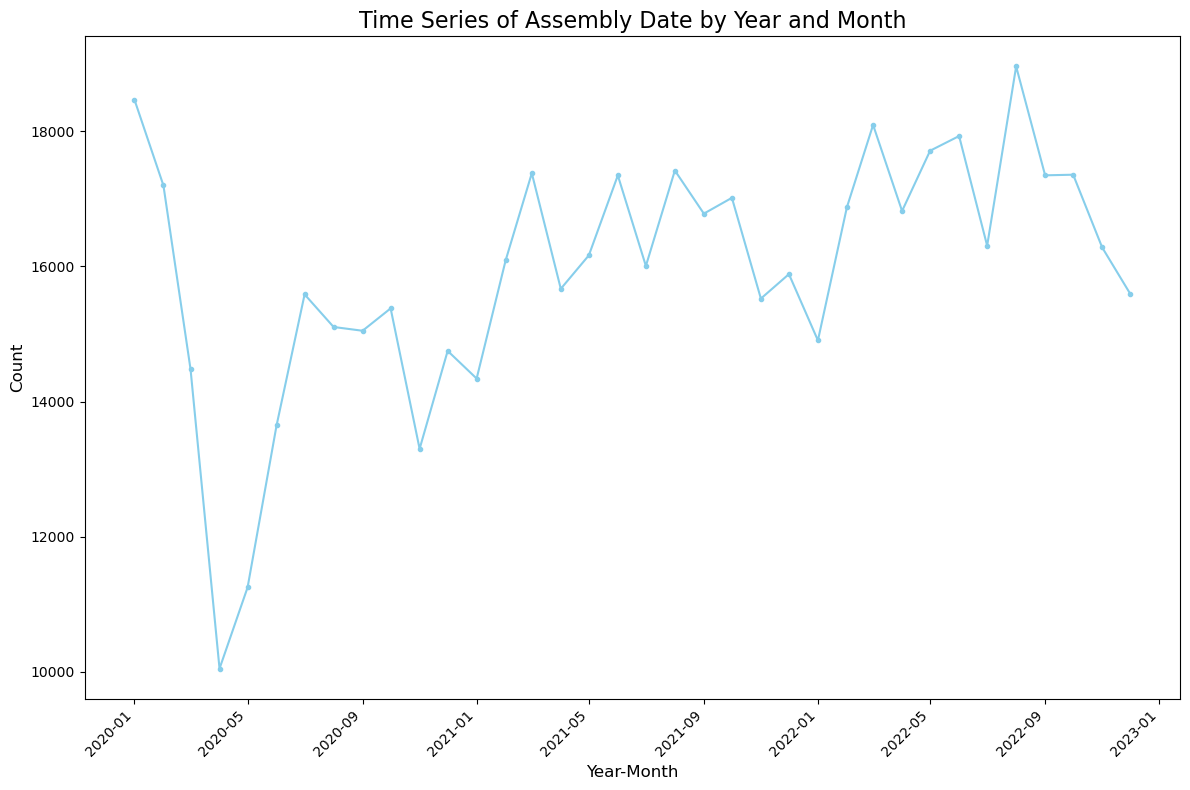

In [69]:
plot_timeseries(df_train, 'Assembly Date')

In [70]:
print(df_train["Assembly Date"].max().date())
print(df_train["Assembly Date"].min().date())

2022-12-31
2020-01-01


## **Attorney/Representative**

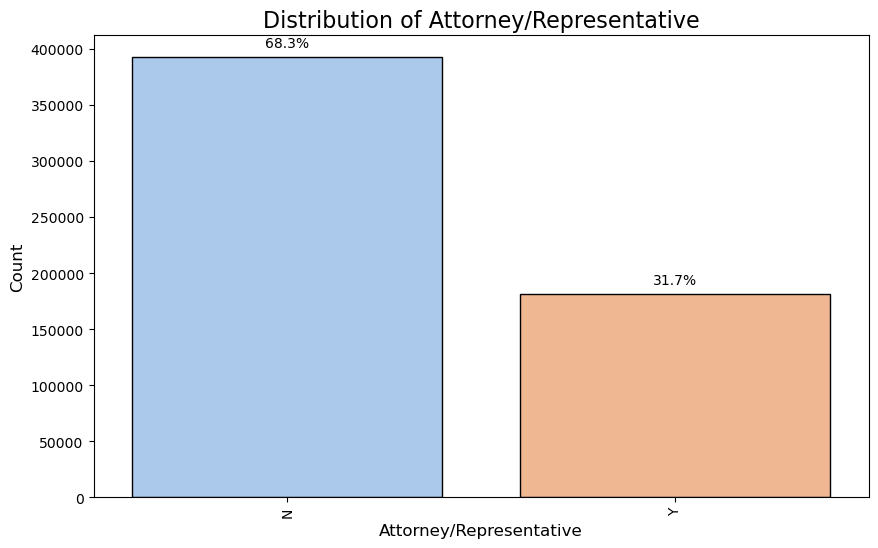

,Count,Unique,Top (Mode),Frequency of Top,Missing,Missing %
0,574026,2,N,392291,0,0.000


In [72]:
plot_categorical_distribution(df_train, 'Attorney/Representative')

In [73]:
# Change Attorney/Representative to Category
df_train['Attorney/Representative'] = df_train['Attorney/Representative'].astype('category')
df_test['Attorney/Representative'] = df_test['Attorney/Representative'].astype('category')

## **Average Weekly Wage**

**Observations on Average Weekly Wage:**
* Minimum is 0: doesn't make a lot of sense to receive 0$
* Maximum is 2828079:very high value compared to others
* 58.4% of zeros
* mean is 491: even tho they are many 0, there are people with very high values
* 28651 missing values (5%)
* Keep as float64

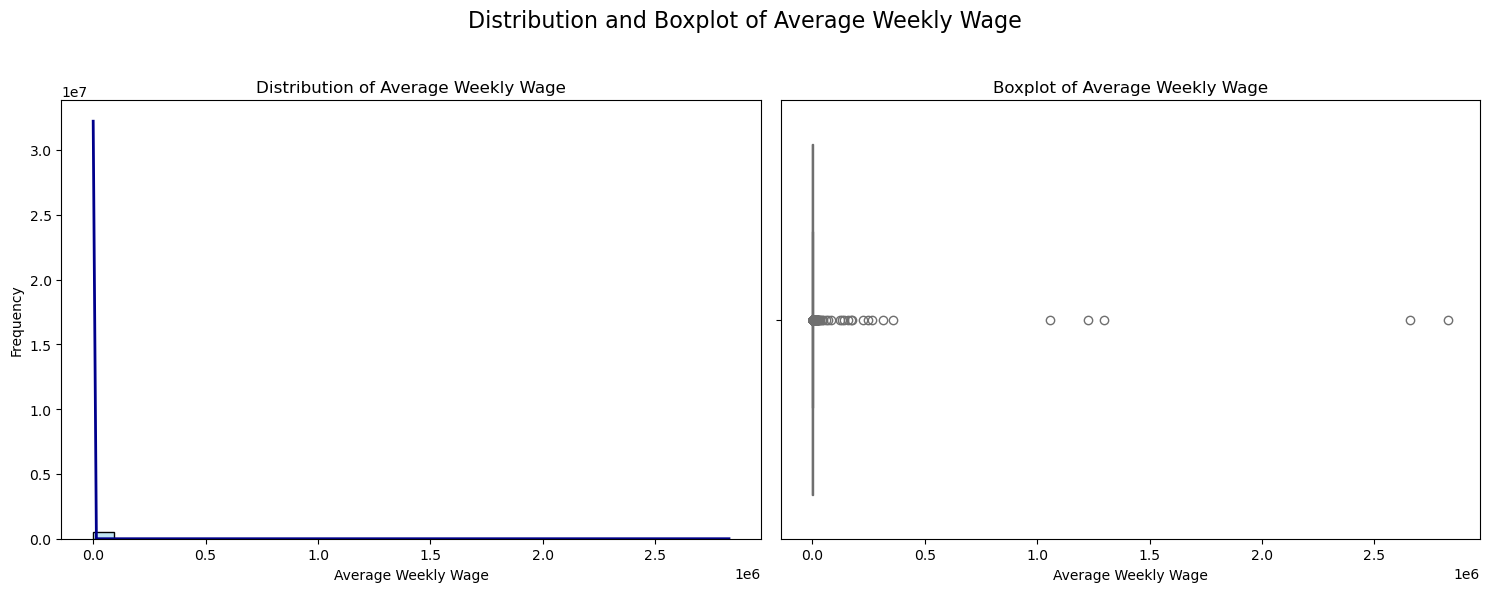

,count,mean,std,min,25%,50%,75%,max,missing,missing%,zeros,zeros%
Average Weekly Wage,545375.000,491.088,6092.918,0.000,0.000,0.000,841.000,2828079.000,28651,4.991,335450,58.438


In [76]:
plot_distribution_and_boxplot(df_train, 'Average Weekly Wage')

## **Birth Year**

**Observations on Birth Year:**
* Minimum is 0: makes no sense that someone was born on this year and they are 25081 values with this
* Maximum is 2018: No person should be working that was born in this year
* mean 1887: it doesnt make sense this year, but its because of the extreme values
* This variable needs to be treated since some values are absurd
* 29078 missing values representing 5%
* Type float converted to an int

In [79]:
#Convert Birth Year to an int
df_train['Birth Year'] = df_train['Birth Year'].astype("Int64")
df_test['Birth Year']=df_test['Birth Year'].astype("Int64")

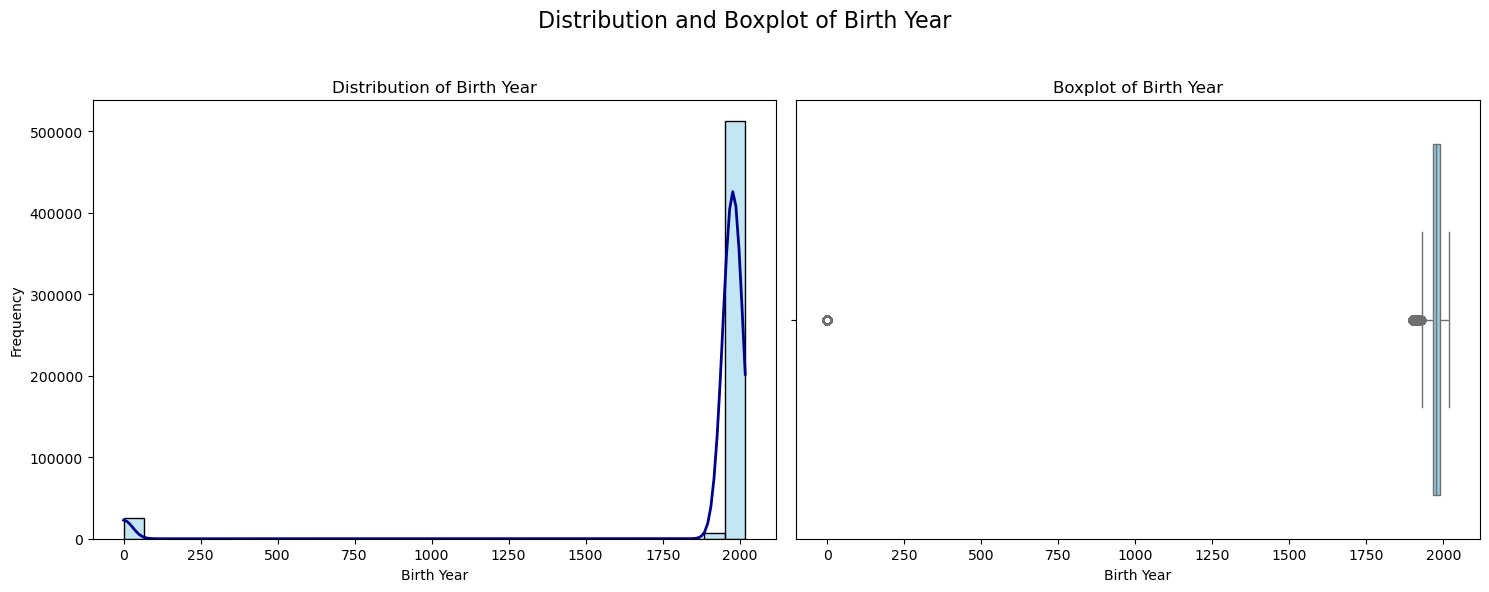

,count,mean,std,min,25%,50%,75%,max,missing,missing%,zeros,zeros%
Birth Year,544948.000,1886.768,414.644,0.000,1965.000,1977.000,1989.000,2018.000,29078,5.066,25081,4.369


In [80]:
plot_distribution_and_boxplot(df_train, 'Birth Year')

## **C-2 Date**

**Observations on C-2 Date:**
* Most frequent date is 2021-05-11
* 14560 missing values (2.5%)
* Type object converted to datetime

In [83]:
# check if all cells match the YYY-MM-DD format
print(df_train['C-2 Date'].str.match(r'^\d{4}-\d{2}-\d{2}$').all())
print(df_test['C-2 Date'].str.match(r'^\d{4}-\d{2}-\d{2}$').all())

True
True


In [84]:
# Convert C-2 Date to datetime
df_train['C-2 Date'] = pd.to_datetime(df_train['C-2 Date'])
df_test['C-2 Date'] = pd.to_datetime(df_test['C-2 Date'])

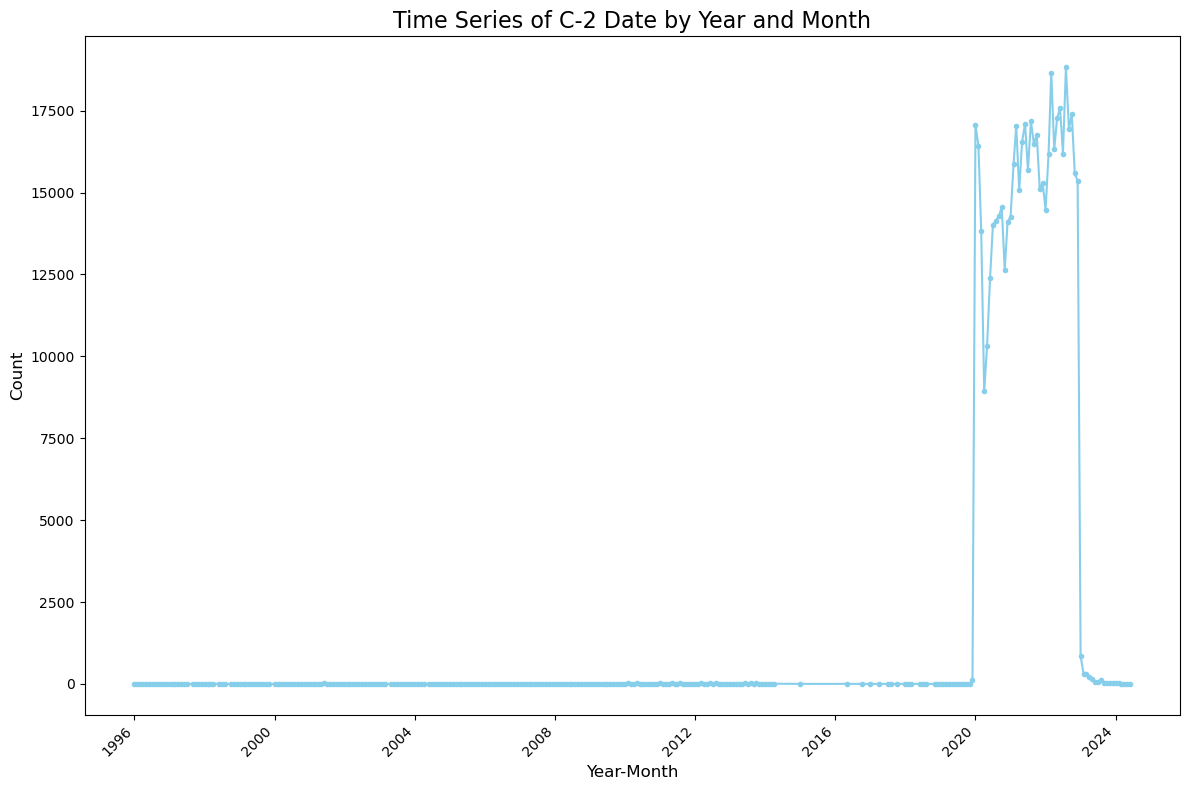

In [85]:
plot_timeseries(df_train, 'C-2 Date')

## **C-3 Date**

**Observations on C-3 Date:**
* Most frequent date is 2021-04-21
* 386781 missing values (67.4%)
* Type object converted to datetime

In [88]:
# check if all cells match the YYY-MM-DD format
print(df_train['C-3 Date'].str.match(r'^\d{4}-\d{2}-\d{2}$').all())
print(df_test['C-3 Date'].str.match(r'^\d{4}-\d{2}-\d{2}$').all())

True
True


In [89]:
# Convert C-3 Date to datetime
df_train['C-3 Date'] = pd.to_datetime(df_train['C-3 Date'])
df_test['C-3 Date'] = pd.to_datetime(df_test['C-3 Date'])

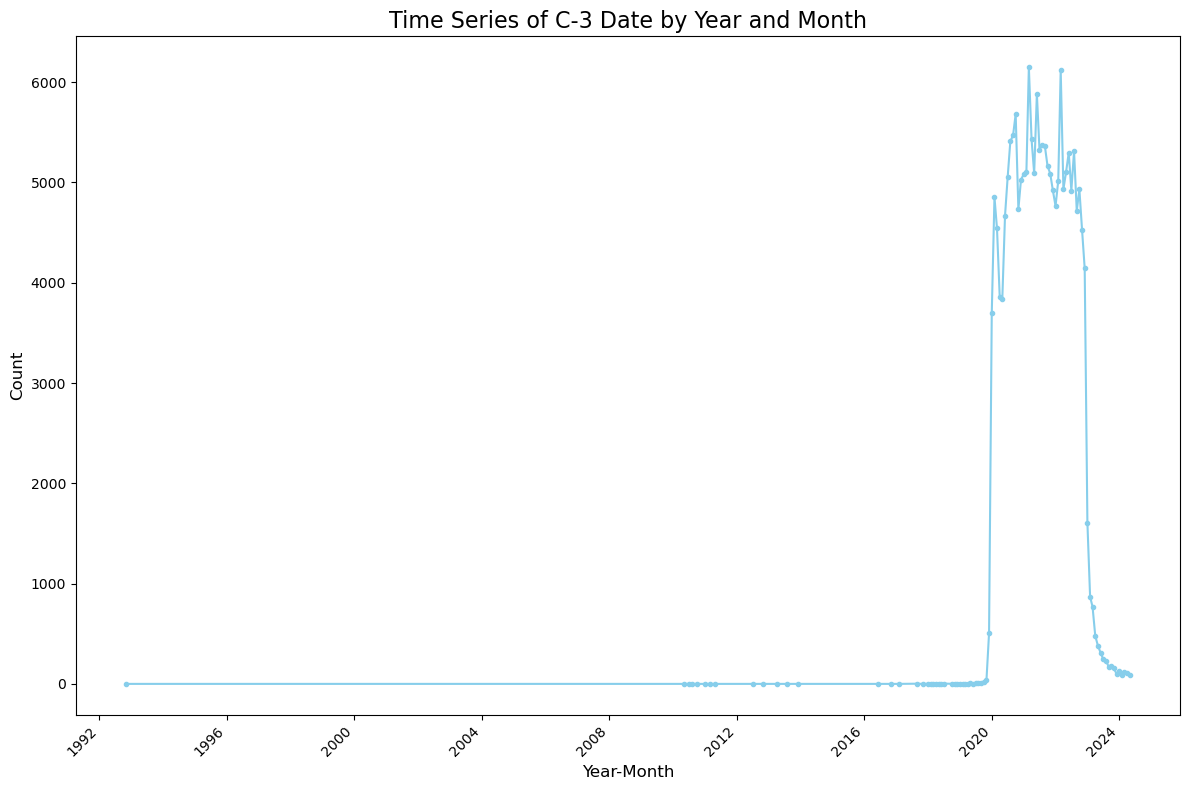

In [90]:
plot_timeseries(df_train, 'C-3 Date')

## **Carrier Name**

**Observations on Carrier Name**:
* Most frequent is STATE INSURANCE FUND

In [93]:
# convert to category
df_train['Carrier Name'] = df_train['Carrier Name'].astype('category')
df_test['Carrier Name'] = df_test['Carrier Name'].astype('category')

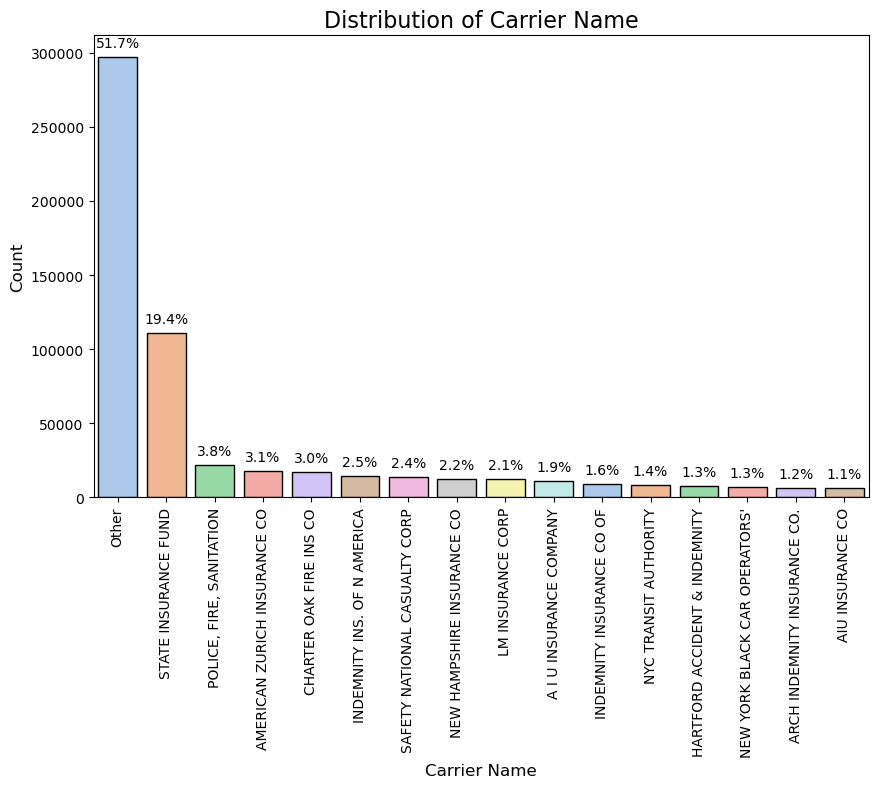

,Count,Unique,Top (Mode),Frequency of Top,Missing,Missing %
0,574026,429,STATE INSURANCE FUND,111144,0,0.000


In [94]:
plot_categorical_distribution(df_train, 'Carrier Name')

## **Carrier Type**

**Observations on Carrier Type**:
* The most frequent is 1A. PRIVATE

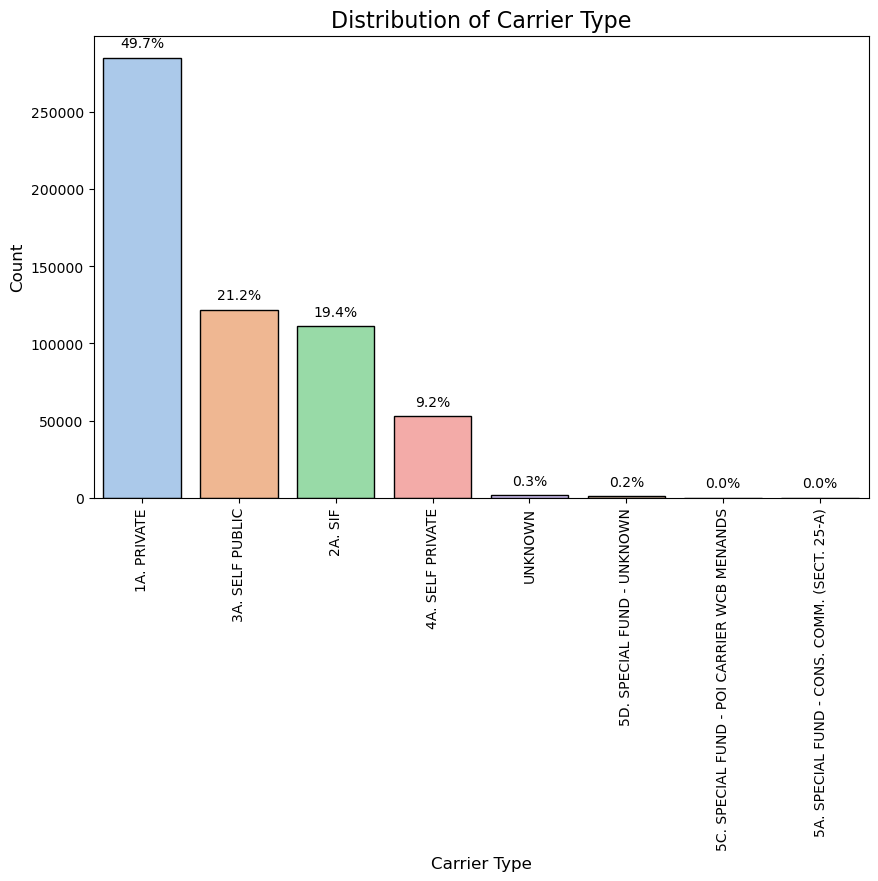

,Count,Unique,Top (Mode),Frequency of Top,Missing,Missing %
0,574026,8,1A. PRIVATE,285368,0,0.000


In [97]:
plot_categorical_distribution(df_train, 'Carrier Type')

In [98]:
# convert Carrier Type to Category
df_train['Carrier Type'] = df_train['Carrier Type'].astype('category')
df_test['Carrier Type'] = df_test['Carrier Type'].astype('category')

## **County of Injury**

**Observations on County of Injury:**
* THe most frequent is SUFFOLK

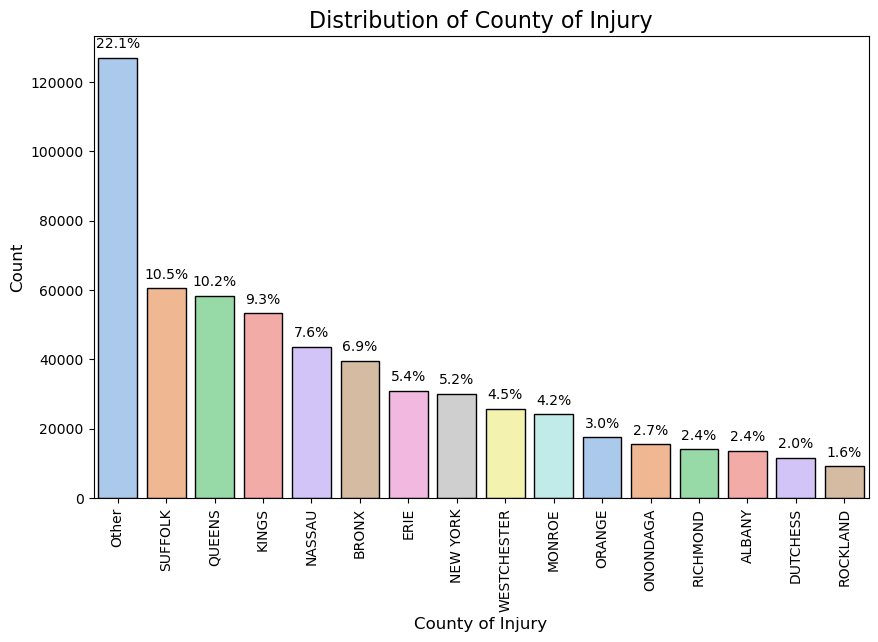

,Count,Unique,Top (Mode),Frequency of Top,Missing,Missing %
0,574026,63,SUFFOLK,60430,0,0.000


In [101]:
plot_categorical_distribution(df_train, 'County of Injury')

In [102]:
# change county of injury to categorical
df_train['County of Injury'] = df_train['County of Injury'].astype('category')
df_test['County of Injury'] = df_test['County of Injury'].astype('category')

## **COVID-19 Indicator**

**Observations on COVID-19 Indicator:**
* Really imbalanced, 95.2% N

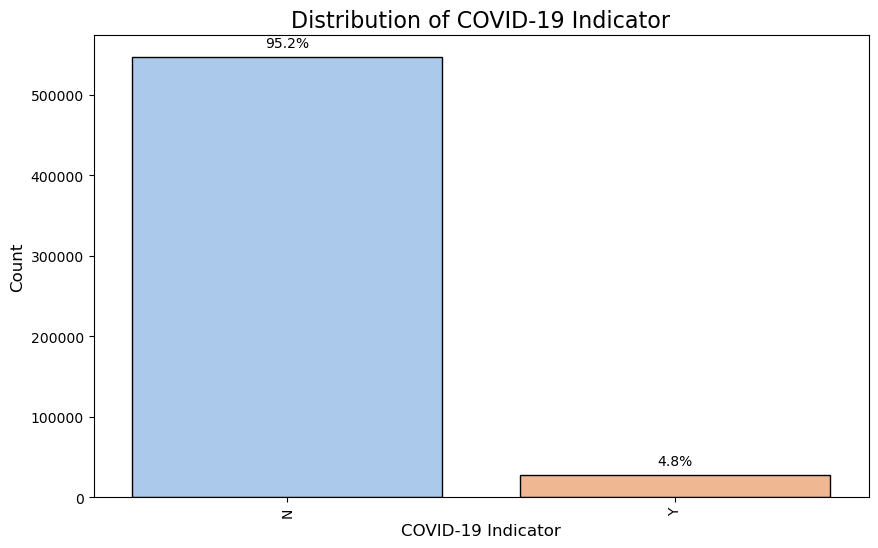

,Count,Unique,Top (Mode),Frequency of Top,Missing,Missing %
0,574026,2,N,546505,0,0.000


In [105]:
plot_categorical_distribution(df_train, 'COVID-19 Indicator')

In [106]:
# change to categorical
df_train['COVID-19 Indicator'] = df_train['COVID-19 Indicator'].astype('category')
df_test['COVID-19 Indicator'] = df_test['COVID-19 Indicator'].astype('category')

## **District Name**

**Observations on District Name:**
* Most frequent is NYC

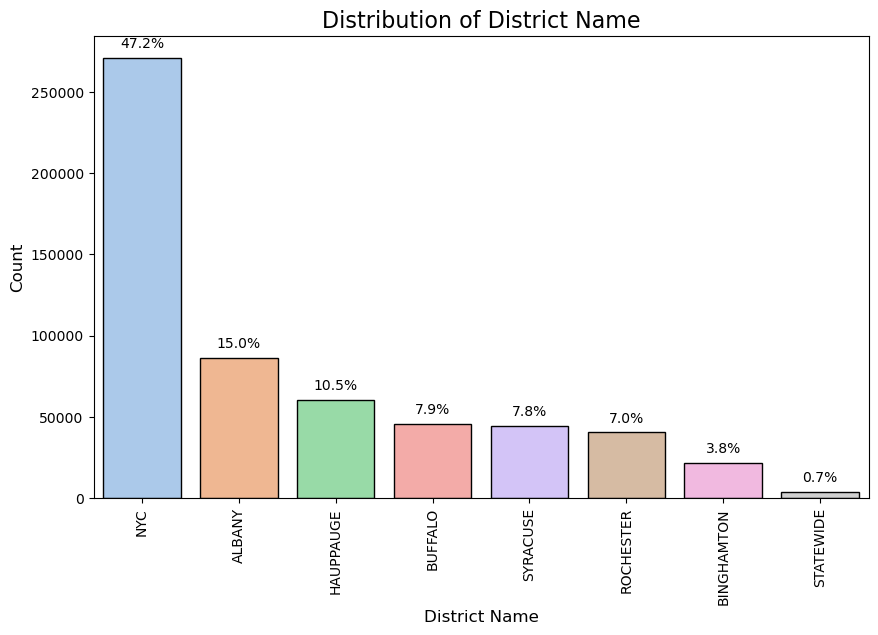

,Count,Unique,Top (Mode),Frequency of Top,Missing,Missing %
0,574026,8,NYC,270779,0,0.000


In [109]:
plot_categorical_distribution(df_train, 'District Name')

In [110]:
# Change district name to categorical
df_train['District Name'] = df_train['District Name'].astype('category')
df_test['District Name'] = df_test['District Name'].astype('category')

## **First Hearing Date**

**Observations on First Hearing Date**:
* The most frequent date is 2022-04-15
* 423228 missing values (73.7%): means that 73.7% of claims have not yet had a hearing scheduled
* Type object converted to datetime

In [113]:
# check if all cells match the YYY-MM-DD format
print(df_train['First Hearing Date'].str.match(r'^\d{4}-\d{2}-\d{2}$').all())
print(df_test['First Hearing Date'].str.match(r'^\d{4}-\d{2}-\d{2}$').all())

True
True


In [114]:
# Convert First Hearing Date to datetime
df_train['First Hearing Date'] = pd.to_datetime(df_train['First Hearing Date'])
df_test['First Hearing Date'] = pd.to_datetime(df_test['First Hearing Date'])

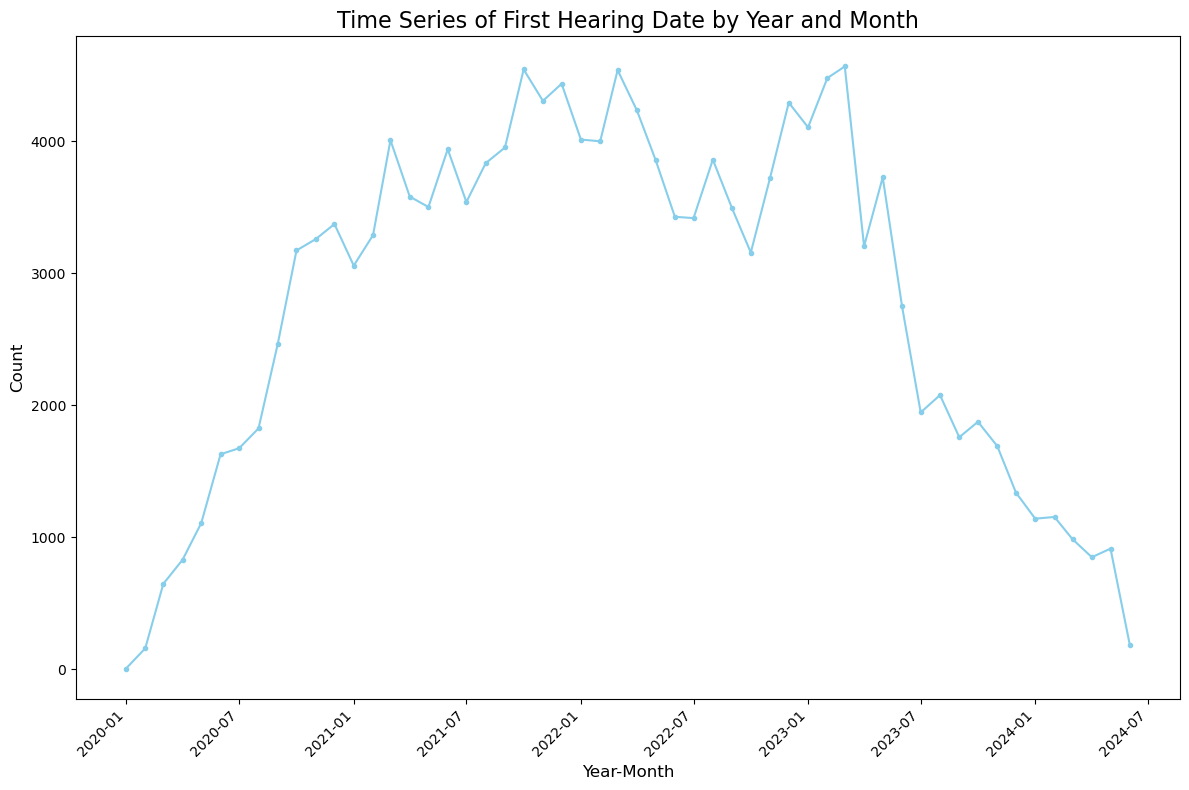

In [115]:
plot_timeseries(df_train, 'First Hearing Date')

## **Gender**

**Observations on Gender**:
* We have U and X: probably meaning Unknown and X non-binary

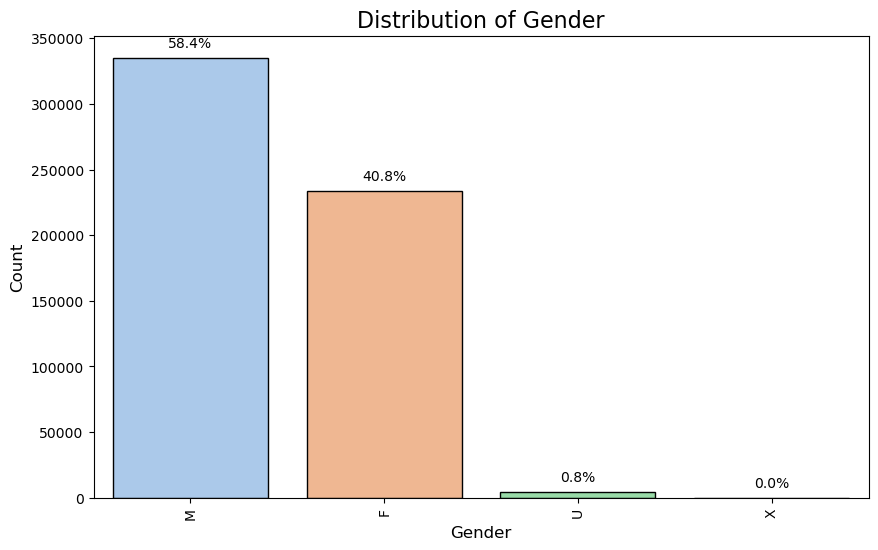

,Count,Unique,Top (Mode),Frequency of Top,Missing,Missing %
0,574026,4,M,335218,0,0.000


In [118]:
plot_categorical_distribution(df_train, 'Gender')

In [119]:
# change Gender to categorical
df_train['Gender'] = df_train['Gender'].astype('category')
df_test['Gender'] = df_test['Gender'].astype('category')

## **IME-4 Count**

**Observations on IME-4 Count:**
* Minimum is 1
* Maximum is 73
* Mean is 3
* 441223 missing values (76.8%)
* Type float converted to an int

In [122]:
# Converted IME-4 Count to an int
df_train['IME-4 Count'] = df_train['IME-4 Count'].astype("Int64")
df_test['IME-4 Count'] = df_test['IME-4 Count'].astype("Int64")


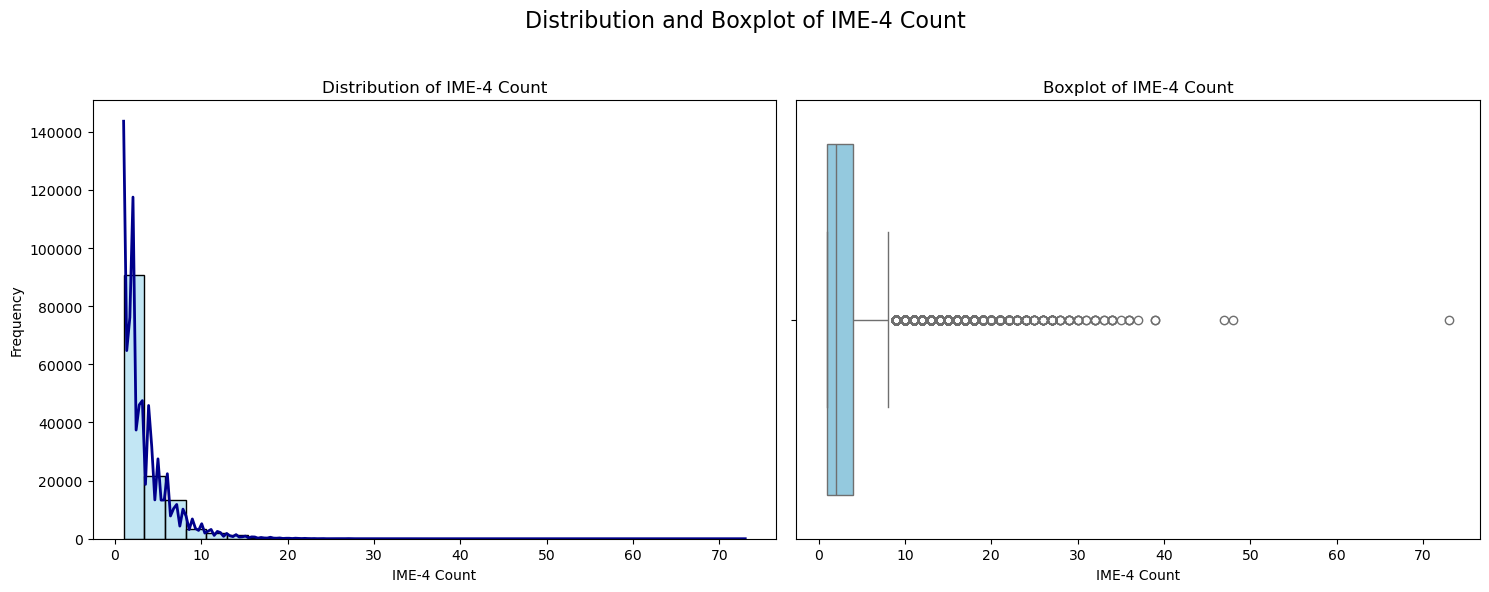

,count,mean,std,min,25%,50%,75%,max,missing,missing%,zeros,zeros%
IME-4 Count,132803.000,3.207,2.832,1.000,1.000,2.000,4.000,73.000,441223,76.865,0,0.000


In [123]:
plot_distribution_and_boxplot(df_train, 'IME-4 Count')

## **Industry Code**

**Observations on Industry Code:**
* 9958 missing values (1.7%)
* Type float converted to a category

In [126]:
# Converted Industry Code tocategory
df_train['Industry Code'] = df_train['Industry Code'].astype('category')
df_test['Industry Code'] = df_test['Industry Code'].astype('category')

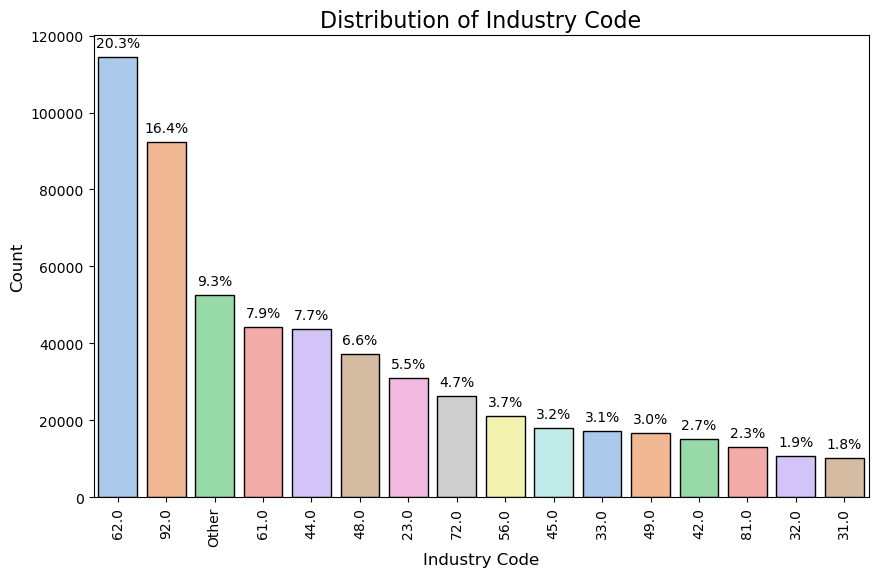

,Count,Unique,Top (Mode),Frequency of Top,Missing,Missing %
0,564068,24,62.000,114339,9958,1.735


In [127]:
plot_categorical_distribution(df_train, 'Industry Code')

## **Industry Code Description**

**Observations on Industry Code Description:**
* Most frequent is HEALTH CARE AND SOCIAL ASSISTANCE
* 9958 missing values (1.7%): same missing values as Industry Code

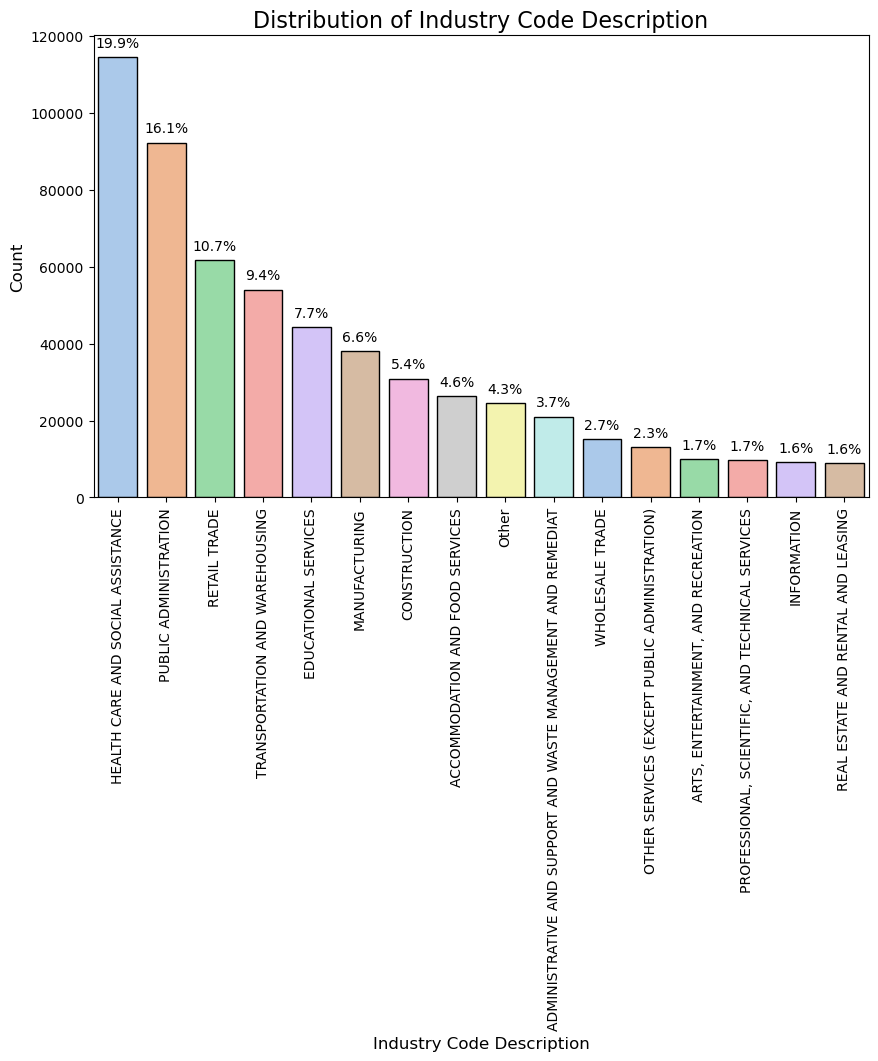

,Count,Unique,Top (Mode),Frequency of Top,Missing,Missing %
0,564068,20,HEALTH CARE AND SOCIAL ASSISTANCE,114339,9958,1.735


In [130]:
plot_categorical_distribution(df_train,"Industry Code Description")

## **Medical Fee Region**

**Observations on Medical Fee Region:**
* The most frequent region is IV
* We have 5.8% with UK which probably means Unknown

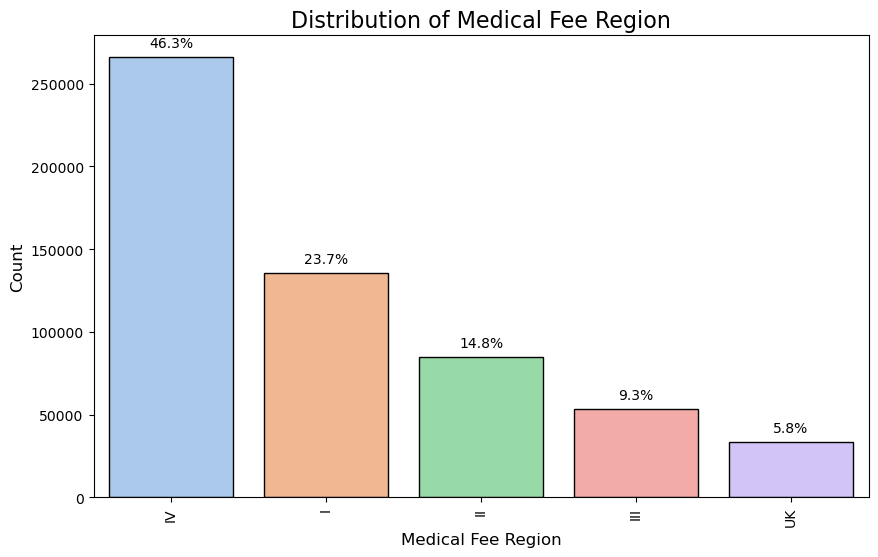

,Count,Unique,Top (Mode),Frequency of Top,Missing,Missing %
0,574026,5,IV,265981,0,0.000


In [133]:
plot_categorical_distribution(df_train,"Medical Fee Region")

In [134]:
# change medical fee region to category
df_train['Medical Fee Region'] = df_train['Medical Fee Region'].astype('category')
df_test['Medical Fee Region'] = df_test['Medical Fee Region'].astype('category')

## **WCIO Cause of Injury Code**

**Observations on  WCIO Cause of Injury Code:**
* 15640 missing values (2.7%)
* Type float converted to a category

In [137]:
# Converted WCIO Cause of Injury Code to Category
df_train['WCIO Cause of Injury Code'] = df_train['WCIO Cause of Injury Code'].astype('category')
df_test['WCIO Cause of Injury Code'] = df_test['WCIO Cause of Injury Code'].astype('category')

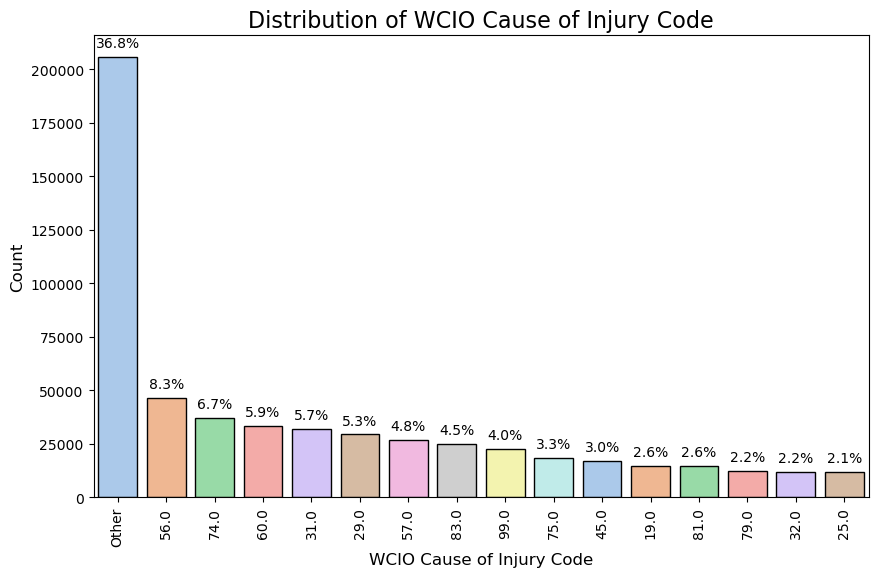

,Count,Unique,Top (Mode),Frequency of Top,Missing,Missing %
0,558386,77,56.000,46610,15640,2.725


In [138]:
plot_categorical_distribution(df_train,"WCIO Cause of Injury Code")

## **WCIO Cause of Injury Description**

**Observations on WCIO Cause of Injury Description:**
* The most frequent cause of injury is LIFTING
* 15640 missing values (2.7%): same quantity of missing values as WCIO Cause of Injury Code


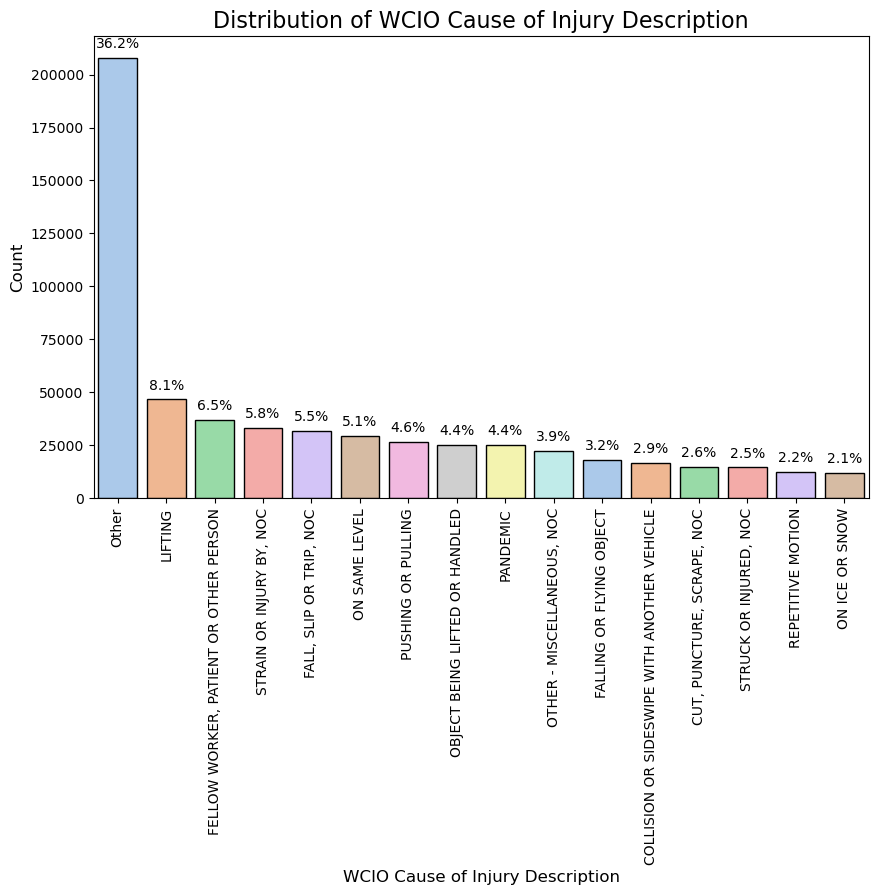

,Count,Unique,Top (Mode),Frequency of Top,Missing,Missing %
0,558386,74,LIFTING,46610,15640,2.725


In [141]:
plot_categorical_distribution(df_train,"WCIO Cause of Injury Description")

## **WCIO Nature of Injury Code**

**Observations on  WCIO Nature of Injury Code:**
* 15657 missing values (2.7%)
* Type float converted to a category

In [144]:
# Converted WCIO Nature of Injury Code to a category
df_train['WCIO Nature of Injury Code'] = df_train['WCIO Nature of Injury Code'].astype('category')
df_test['WCIO Nature of Injury Code'] = df_test['WCIO Nature of Injury Code'].astype('category')

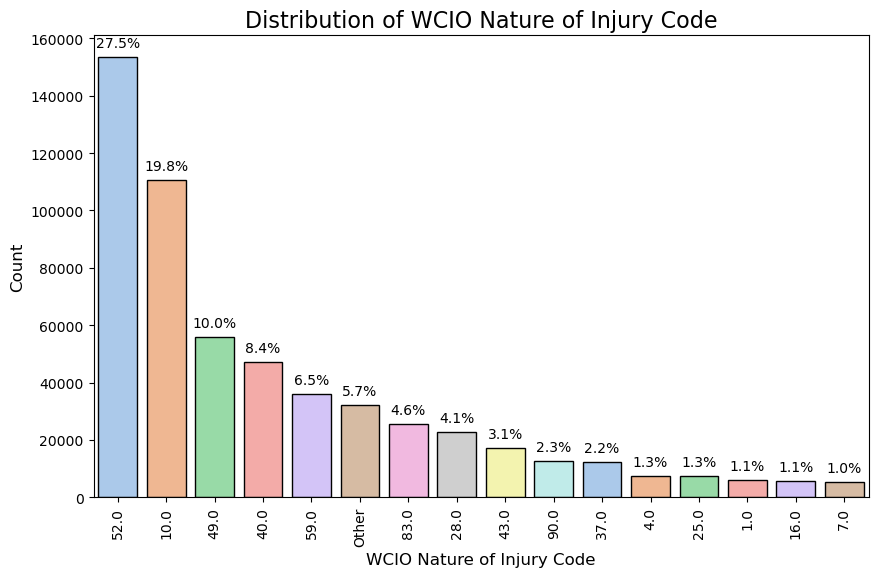

,Count,Unique,Top (Mode),Frequency of Top,Missing,Missing %
0,558369,55,52.000,153373,15657,2.728


In [145]:
plot_categorical_distribution(df_train,"WCIO Nature of Injury Code")

## **WCIO Nature of Injury Description**

**Observations on WCIO Nature of Injury Description:**
* The most frequent nature of injury is STRAIN OR TEAR
* 15657 missing values (2.7%): same quantity of missing values as WCIO Nature of Injury Code

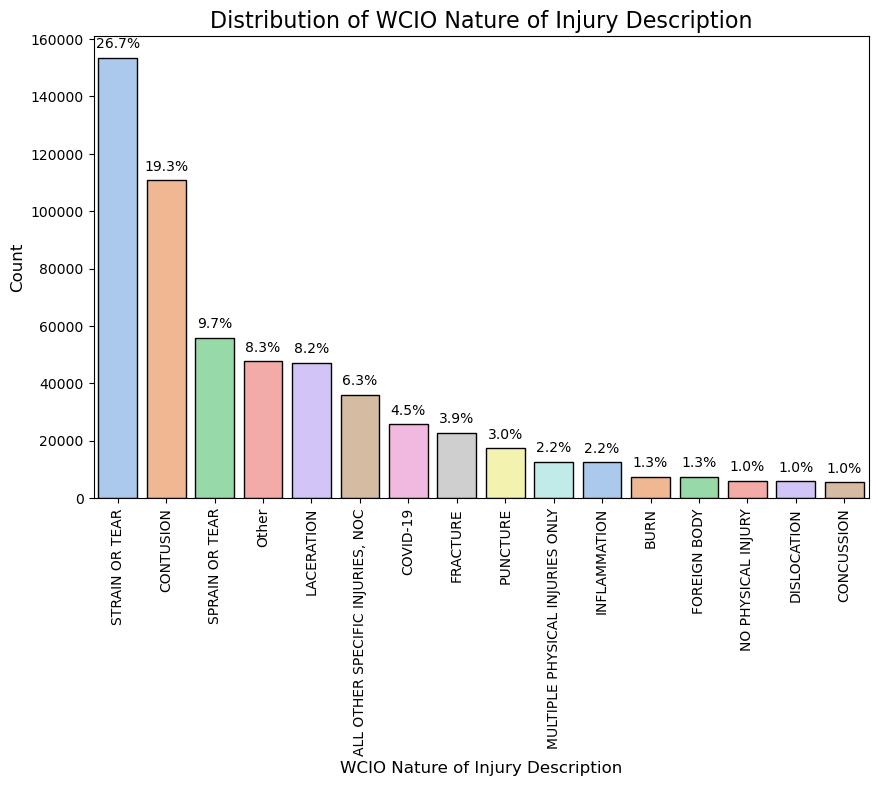

,Count,Unique,Top (Mode),Frequency of Top,Missing,Missing %
0,558369,55,STRAIN OR TEAR,153373,15657,2.728


In [148]:
plot_categorical_distribution(df_train,"WCIO Nature of Injury Description")

## **WCIO Part Of Body Code**

**Observations on WCIO Part Of Body Code:**
* 17082 missing values (2.97%)
* Type float converted to a category

In [151]:
# Converted WCIO Part Of Body Code to categorical
df_train['WCIO Part Of Body Code'] = df_train['WCIO Part Of Body Code'].astype('category')
df_test['WCIO Part Of Body Code'] = df_test['WCIO Part Of Body Code'].astype('category')

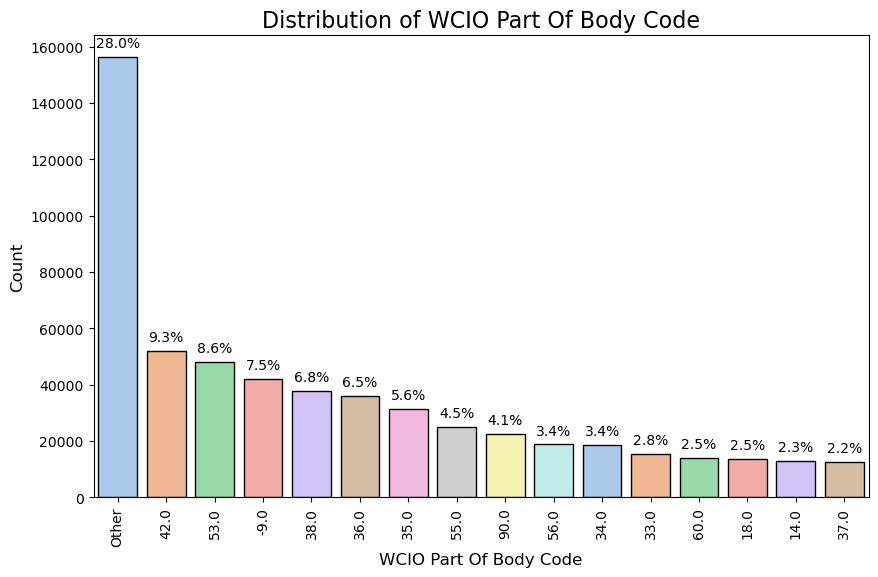

,Count,Unique,Top (Mode),Frequency of Top,Missing,Missing %
0,556944,56,42.000,51862,17082,2.976


In [152]:
plot_categorical_distribution(df_train,"WCIO Part Of Body Code")

## **WCIO Part Of Body Description**

**Observations on WCIO Part Of Body Description:**
* The most frequent is LOWER BACK AREA
* 17082 missing values (2.97%): same quantity of missing values as WCIO Part Of Body Code

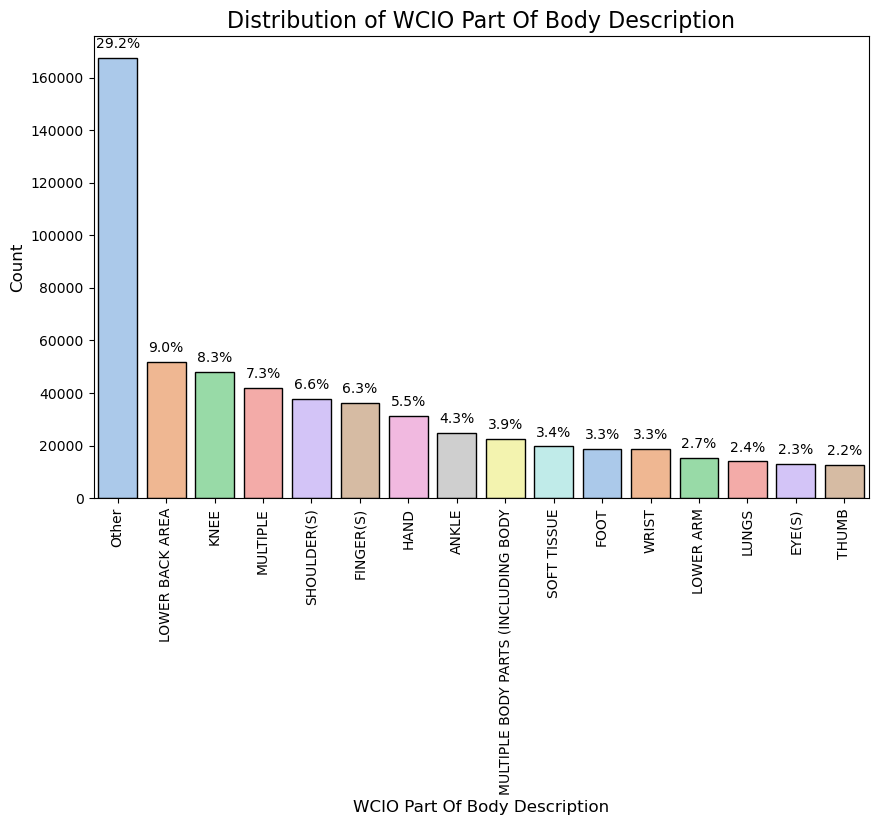

,Count,Unique,Top (Mode),Frequency of Top,Missing,Missing %
0,556944,54,LOWER BACK AREA,51862,17082,2.976


In [155]:
plot_categorical_distribution(df_train,"WCIO Part Of Body Description")

## **Zip Code**

**Observations on Zip Code:**
* The most frequent zip code is 11236
* 28637 missing values (4.98%)
* Type float converted to a category

In [158]:
# Convert to category
df_train['Zip Code'] = df_train['Zip Code'].astype('category')
df_test['Zip Code'] = df_test['Zip Code'].astype('category')

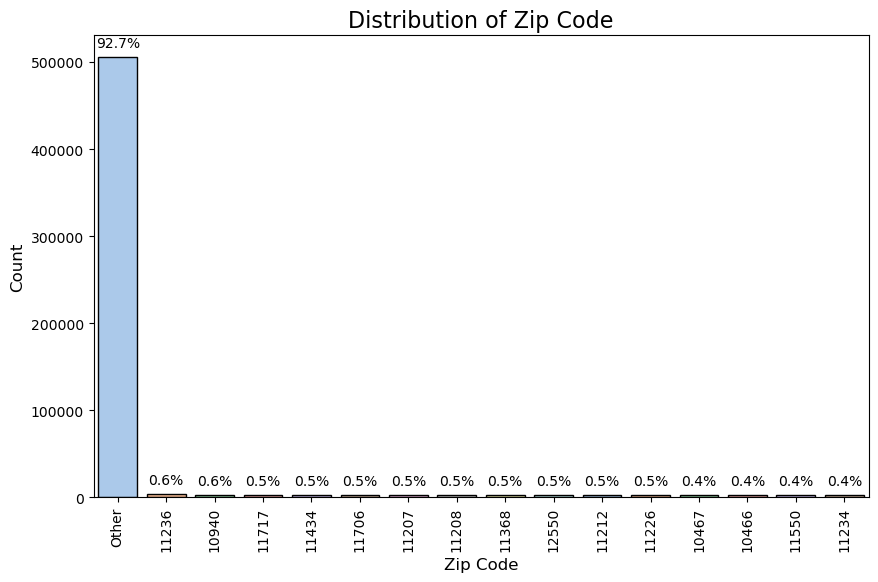

,Count,Unique,Top (Mode),Frequency of Top,Missing,Missing %
0,545389,664,11236,3398,28637,4.989


In [159]:
plot_categorical_distribution(df_train,"Zip Code")

## **Claim Injury Type**

**Observations on Claim Injury Type:**
* The most frequent is 2. NON-COMP

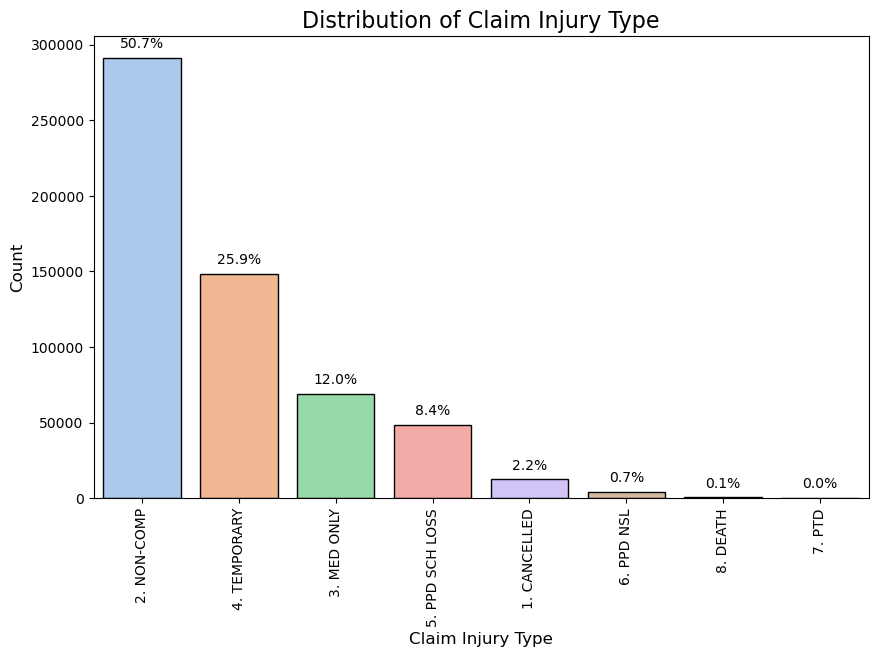

,Count,Unique,Top (Mode),Frequency of Top,Missing,Missing %
0,574026,8,2. NON-COMP,291078,0,0.000


In [162]:
plot_categorical_distribution(df_train, 'Claim Injury Type')

In [163]:
#Convert to Category
df_train['Claim Injury Type'] = df_train['Claim Injury Type'].astype('category')

## **Number of Dependents**

**Observations on Number of Dependents:**
* mean is 3
* Minimum is 0
* Maximum is 6
* 81665 zeros (14.2%)
* Type float converted to an int

In [166]:
# Converted Number of Dependents to an int
df_train["Number of Dependents"] = df_train["Number of Dependents"].astype("int")
df_test["Number of Dependents"] = df_test["Number of Dependents"].astype("int")

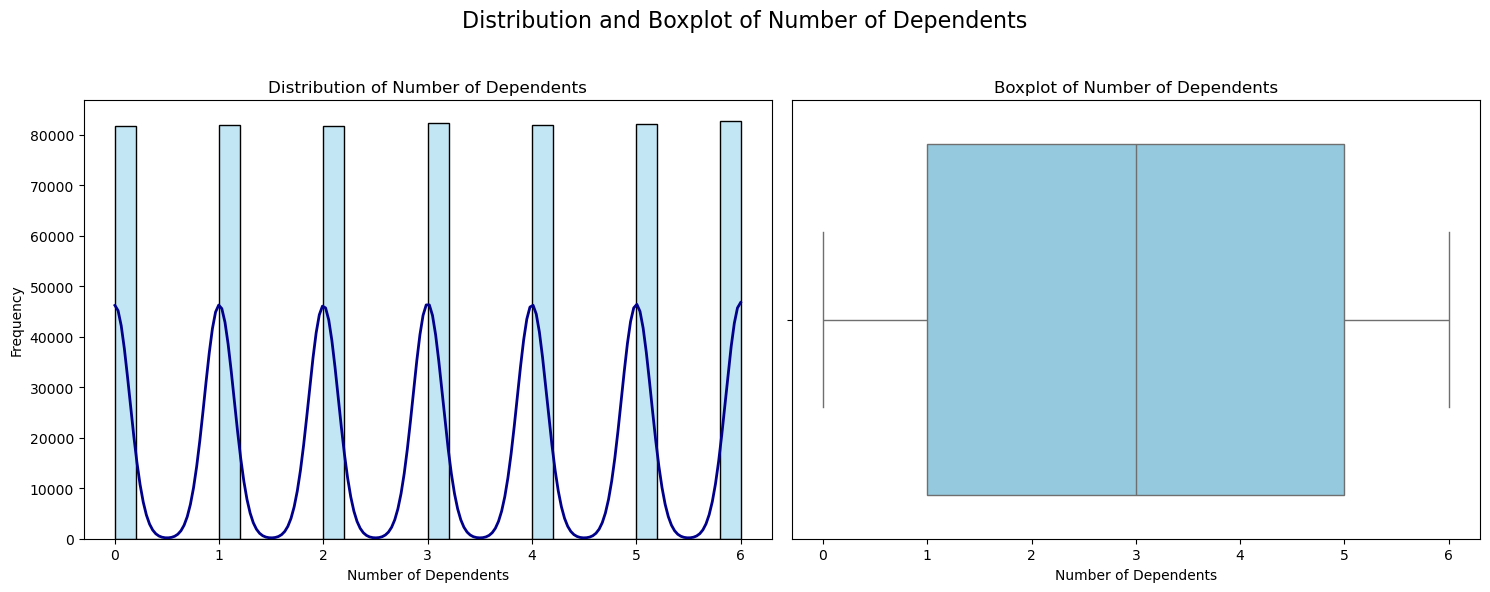

,count,mean,std,min,25%,50%,75%,max,missing,missing%,zeros,zeros%
Number of Dependents,574026.000,3.007,2.001,0.000,1.000,3.000,5.000,6.000,0,0.000,81665,14.227


In [167]:
plot_distribution_and_boxplot(df_train, 'Number of Dependents')

# **Multivariate Analysis**

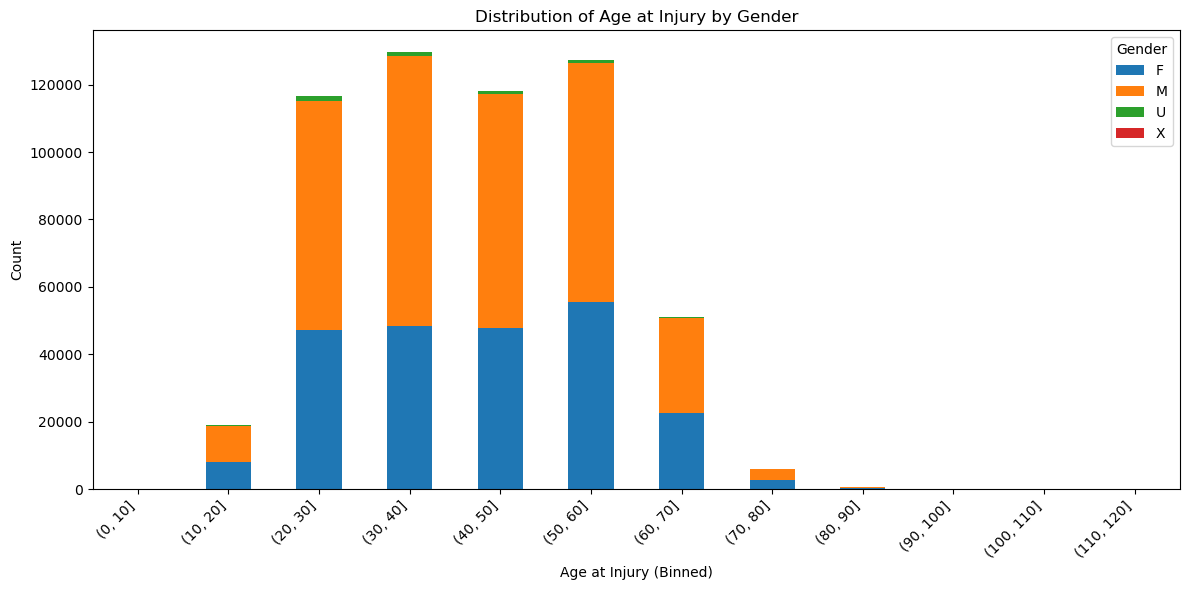

In [169]:
cat1 = 'Age at Injury'
cat2 = 'Gender'

catpc_df = df_train.groupby([pd.cut(df_train[cat1], bins=range(0, int(df_train[cat1].max()) + 10, 10)), cat2], observed=False).size().unstack(fill_value=0)

catpc_df.plot(kind='bar', stacked=True, figsize=(12, 6), color=['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728'])

plt.title("Distribution of Age at Injury by Gender")
plt.xlabel("Age at Injury (Binned)")
plt.ylabel("Count")
plt.xticks(rotation=45, ha='right')
plt.legend(title="Gender")

plt.tight_layout()
plt.show()

<Figure size 1400x600 with 0 Axes>

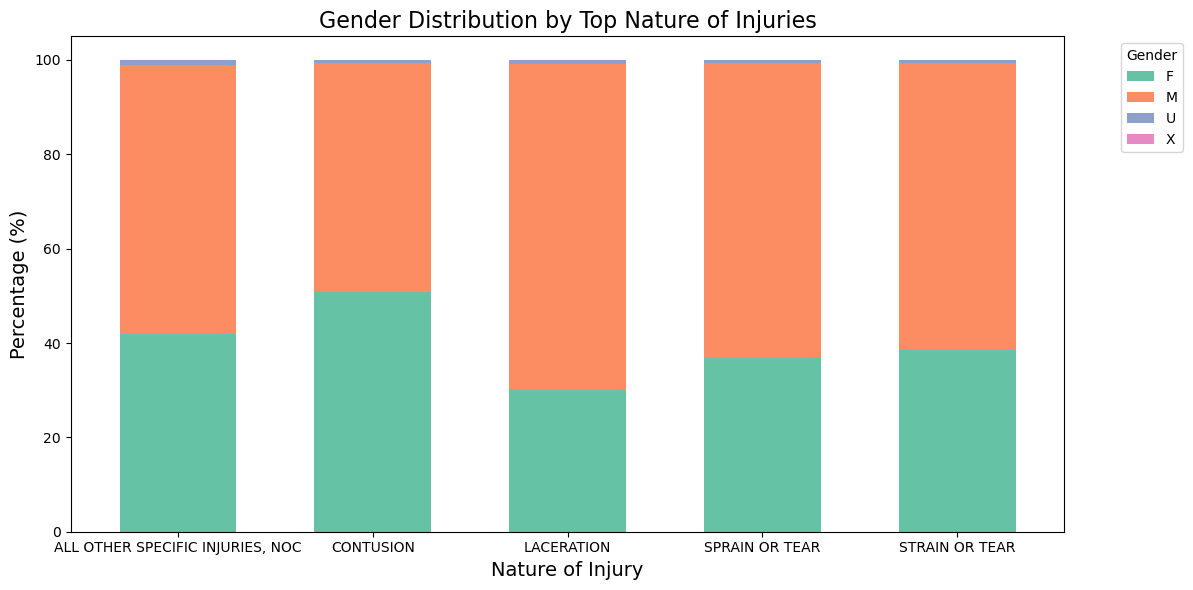

In [170]:
plt.figure(figsize=(14, 6))

top_injuries = df_train['WCIO Nature of Injury Description'].value_counts().head(5).index

injury_subset = df_train[
    df_train['WCIO Nature of Injury Description'].isin(top_injuries)
]

injury_gender = pd.crosstab(
    injury_subset['WCIO Nature of Injury Description'],
    injury_subset['Gender'],
    normalize='index'
) * 100

ax = injury_gender.plot(kind='bar', stacked=True, color=sns.color_palette("Set2"), width=0.6, figsize=(12, 6))
plt.title('Gender Distribution by Top Nature of Injuries', fontsize=16)
plt.xlabel('Nature of Injury', fontsize=14)
plt.ylabel('Percentage (%)', fontsize=14)
plt.xticks(rotation=0, ha='center')  
plt.legend(title='Gender', bbox_to_anchor=(1.05, 1), loc='upper left') 


plt.tight_layout()
plt.show()

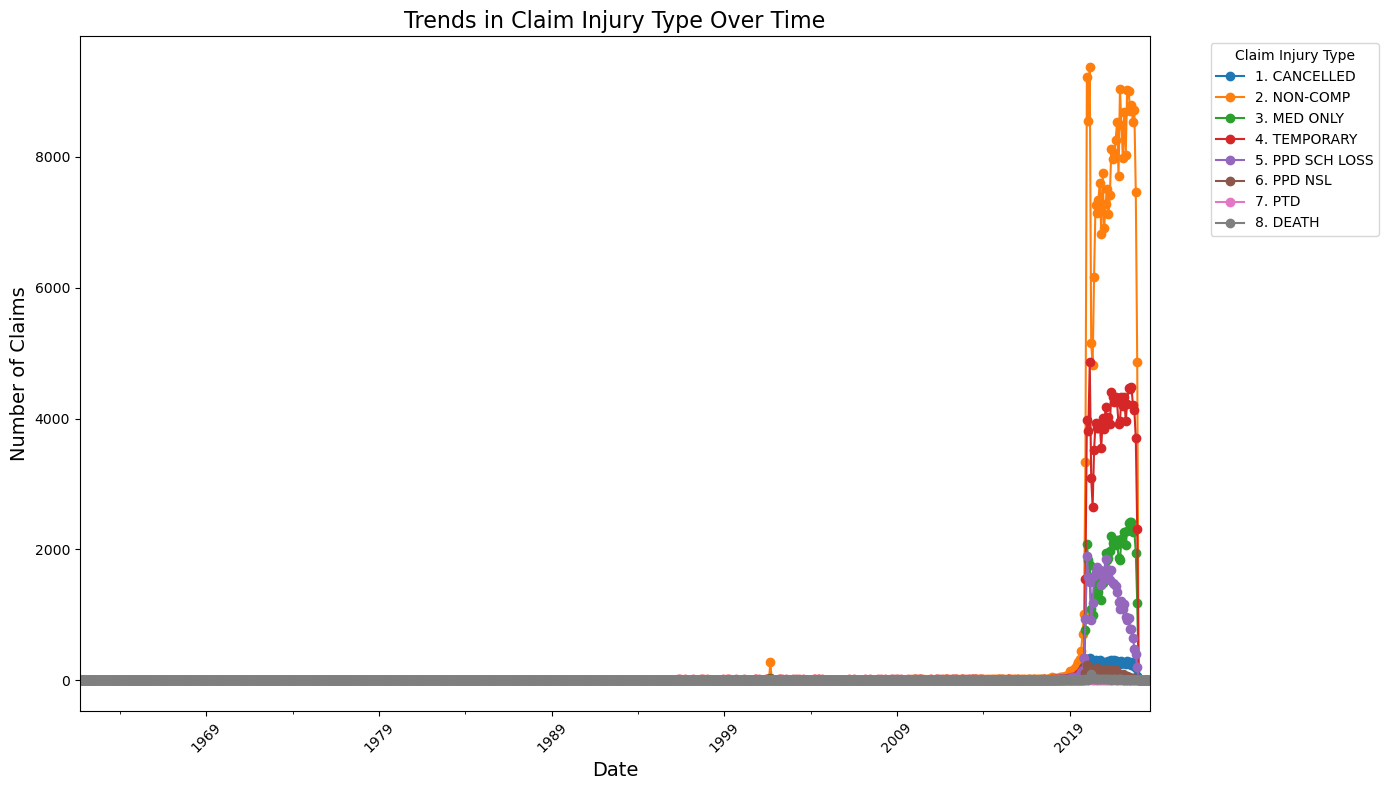

In [171]:
df_aux= df_train.copy()
df_aux.reset_index(inplace=True)

# Set 'Accident Date' as the index to facilitate time-based analysis
df_aux.set_index('Accident Date', inplace=True)

# Resample by month and count occurrences of each Claim Injury Type
monthly_trends = df_aux.groupby('Claim Injury Type').resample('M').size().unstack(level=0).fillna(0)

# Plot the trends
plt.figure(figsize=(14, 8))
monthly_trends.plot(ax=plt.gca(), marker='o', linewidth=1.5)
plt.title('Trends in Claim Injury Type Over Time', fontsize=16)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Number of Claims', fontsize=14)
plt.legend(title='Claim Injury Type', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
#reset the index for further notice
df_aux.reset_index(inplace=True)